Name: Alexander Ashmore

Development environment (Colab or local): Colab

# Deep Learning Analysis

- **Tasks:** 
  1. Compare the performance of a small CNN (LeNet-5) with the results you got for PCA, LDA, and SVM using the Olivetti faces dataset
  2. Choose, implement (if not available in a library),  and run a baseline for the IMDB text classification from lecture
    - Consider what techniques would be appropriate for this task.
    - Also consider the fact that this is a text dataset, so some techniques might not work well or may be cumbersome to engineer.
    - Include a description of your baseline and explain why this baseline makes sense for this problem.
  3. Run a vanilla RNN on the IMDB text classification dataset and compare its performance against your baseline.
  4. Explore data augmentation techniques for both tasks.
    - For the image task, you may use the built-in Keras data augmentation function (tf.keras.preprocessing.image.ImageDataGenerator).
    - For the text task, you may find an external function that you import or write your own data augmentation.
    - Describe what data augmentation methods you used and the motivation behind them (why you think they'll help).

_Where it is relevant, make sure you follow deep learning best practices discussed in class (Day 24). In particular, performing a hyperparameter search and setting up an proper train, dev, and test framework for evaluating hyperparameters and your final selected model._

- Evaluation scenarios:
  1. Facial Recognition
    - Use 20% of the images for training and 80% for testing
    - Use 50% of the images for training and 50% for testing
    - Use 80% of the images for training and 20% for testing
    - Always use the first K images per person for training, and the remaining ones for testing (see data split code below)
    - Plot CMC curve and confusion matrix for each combination of scenario

  2. Review Text Classification
    - Use 2,000 examples for training and 2,000 examples for testing (smaller than the example in lecture)
    - Experiment with several RNN configurations
    - Plot the training and validation plots for your RNN and for your baseline if your baseline has a training phase.
    - Plot a confusion matrix of the predictions.

- Discussion:
  1. Facial Recognition
    - Is LeNet-5 better than PCA/LDA/SVM?
    - Is there a clear difference in performance for different train/test data splits?
    - Does data augmentation improve the results?
  
  2. Review Text Classification
    - Is the vanilla RNN better than a simple baseline?
    - How sensitive is the RNN performance to hyperparameter selection?
    - Does data augmentation improve the results? More or less than for the facial recognition task? What properties of the two tasks do you think is leading to the data augmentation effects you are seeing?

## Olivetti faces dataset (AT&T Laboratories Cambridge)

As described on the original website:

"*There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).*"

The original dataset consisted of 92 x 112, while the version available here consists of 64x64 images.

- Classes: 40
- Samples per class: 10
- Samples total: 400
- Dimensionality: 4096 (64x64 pixels)
- Pixel values: real, between 0 and 1


In [33]:
from sklearn.datasets import fetch_olivetti_faces
from google.colab.patches import cv2_imshow
import numpy as np

#project4
#added
import cv2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#worko?
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import metrics

#project 5
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils as u
from keras.datasets import cifar10

import time
from keras.utils import np_utils

from sklearn.metrics import confusion_matrix,f1_score, precision_score, recall_score
#import numpy as np
#import sklearn as sk
#import matplotlib.pyplot as plt
#from sklearn.datasets import fetch_olivetti_faces
#from sklearn.model_selection import train_test_split
#fs = fetch_olivetti_faces()
#from keras.utils import np_utils
#import h5py
#import tensorflow as tf
#import pandas as pd
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from keras.optimizers import adam_v2
#import time
#import cv2
#from PIL import Image,ImageOps

#from google.colab import drive



# Get the dataset

In [34]:
faces = fetch_olivetti_faces()

_, img_height, img_width = faces.images.shape

print(faces.images.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 64, 64)


# Split the dataset

## CNN splits

### CNN 20/80

In [35]:
# 20/80
N_IDENTITIES = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZECNN2 = 2                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices += indices[:GALLERY_SIZECNN2]
  probe_indices += indices[GALLERY_SIZECNN2:]

x_trainCNN2 = faces.images[gallery_indices].reshape(-1, img_height, img_width, 1)
y_trainCNN2 = faces.target[gallery_indices]
x_testCNN2 = faces.images[probe_indices].reshape(-1, img_height, img_width, 1)
y_testCNN2 = faces.target[probe_indices]

'''
x_trainCNN2 = faces.images[gallery_indices].reshape(-1, img_height* img_width)
y_trainCNN2 = faces.target[gallery_indices]
x_testCNN2 = faces.images[probe_indices].reshape(-1, img_height* img_width)
y_testCNN2 = faces.target[probe_indices]
'''
print(x_trainCNN2.shape, x_testCNN2.shape)

(80, 64, 64, 1) (320, 64, 64, 1)


### 50/50

In [36]:
# 50/50
N_IDENTITIES = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZECNN5 = 5                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices += indices[:GALLERY_SIZECNN5]
  probe_indices += indices[GALLERY_SIZECNN5:]

x_trainCNN5 = faces.images[gallery_indices].reshape(-1, img_height, img_width, 1)
y_trainCNN5 = faces.target[gallery_indices]
x_testCNN5 = faces.images[probe_indices].reshape(-1, img_height, img_width, 1)
y_testCNN5 = faces.target[probe_indices]

print(x_trainCNN5.shape, x_testCNN5.shape)

(200, 64, 64, 1) (200, 64, 64, 1)


### 80/20

In [37]:
# 80/20
N_IDENTITIES = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZECNN8 = 8                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices += indices[:GALLERY_SIZECNN8]
  probe_indices += indices[GALLERY_SIZECNN8:]

x_trainCNN8 = faces.images[gallery_indices].reshape(-1, img_height, img_width, 1)
y_trainCNN8 = faces.target[gallery_indices]
x_testCNN8 = faces.images[probe_indices].reshape(-1, img_height, img_width, 1)
y_testCNN8 = faces.target[probe_indices]

print(x_trainCNN8.shape, x_testCNN8.shape)

(320, 64, 64, 1) (80, 64, 64, 1)


# PCA,SVM,LDA splits

In [38]:
#PCA 20/80
N_IDENTITIES_PCA = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE_PCA1 = 2                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices_PCA1 = []
probe_indices_PCA1 = []
for i in range(N_IDENTITIES_PCA):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices_PCA1 += indices[:GALLERY_SIZE_PCA1]
  probe_indices_PCA1 += indices[GALLERY_SIZE_PCA1:]

x_train_PCA1 = faces.images[gallery_indices_PCA1].reshape(-1, img_height*img_width) # vectorize train images
y_train_PCA1 = faces.target[gallery_indices_PCA1]
x_test_PCA1 = faces.images[probe_indices_PCA1].reshape(-1, img_height*img_width)    # vectorize test images
y_test_PCA1 = faces.target[probe_indices_PCA1]

print(x_train_PCA1.shape, x_test_PCA1.shape)


(80, 4096) (320, 4096)


In [39]:
#PCA 50/50
N_IDENTITIES_PCA2 = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE_PCA2 = 5                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices_PCA2 = []
probe_indices_PCA2 = []
for i in range(N_IDENTITIES_PCA):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices_PCA2 += indices[:GALLERY_SIZE_PCA2]
  probe_indices_PCA2 += indices[GALLERY_SIZE_PCA2:]

x_train_PCA2 = faces.images[gallery_indices_PCA2].reshape(-1, img_height*img_width) # vectorize train images
y_train_PCA2 = faces.target[gallery_indices_PCA2]
x_test_PCA2 = faces.images[probe_indices_PCA2].reshape(-1, img_height*img_width)    # vectorize test images
y_test_PCA2 = faces.target[probe_indices_PCA2]

print(x_train_PCA2.shape, x_test_PCA2.shape)

(200, 4096) (200, 4096)


In [40]:
#PCA 80/20
N_IDENTITIES_PCA = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE_PCA3 = 8                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices_PCA3 = []
probe_indices_PCA3 = []
for i in range(N_IDENTITIES_PCA):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices_PCA3 += indices[:GALLERY_SIZE_PCA3]
  probe_indices_PCA3 += indices[GALLERY_SIZE_PCA3:]

x_train_PCA3 = faces.images[gallery_indices_PCA3].reshape(-1, img_height*img_width) # vectorize train images
y_train_PCA3 = faces.target[gallery_indices_PCA3]
x_test_PCA3 = faces.images[probe_indices_PCA3].reshape(-1, img_height*img_width)    # vectorize test images
y_test_PCA3 = faces.target[probe_indices_PCA3]

print(x_train_PCA3.shape, x_test_PCA3.shape)

(320, 4096) (80, 4096)


In [41]:
#LDA 20/80
N_IDENTITIES_LDA = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE_LDA1 = 2                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices_LDA1 = []
probe_indices_LDA1 = []
for i in range(N_IDENTITIES_LDA):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices_LDA1 += indices[:GALLERY_SIZE_LDA1]
  probe_indices_LDA1 += indices[GALLERY_SIZE_LDA1:]

x_train_LDA1 = faces.images[gallery_indices_LDA1].reshape(-1, img_height*img_width) # vectorize train images
y_train_LDA1 = faces.target[gallery_indices_LDA1]
x_test_LDA1 = faces.images[probe_indices_LDA1].reshape(-1, img_height*img_width)    # vectorize test images
y_test_LDA1 = faces.target[probe_indices_LDA1]

print(x_train_LDA1.shape, x_test_LDA1.shape)

(80, 4096) (320, 4096)


In [42]:
#LDA 50/50
N_IDENTITIES_LDA = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE_LDA2 = 5                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices_LDA2 = []
probe_indices_LDA2 = []
for i in range(N_IDENTITIES_LDA):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices_LDA2 += indices[:GALLERY_SIZE_LDA2]
  probe_indices_LDA2 += indices[GALLERY_SIZE_LDA2:]

x_train_LDA2 = faces.images[gallery_indices_LDA2].reshape(-1, img_height*img_width) # vectorize train images
y_train_LDA2 = faces.target[gallery_indices_LDA2]
x_test_LDA2 = faces.images[probe_indices_LDA2].reshape(-1, img_height*img_width)    # vectorize test images
y_test_LDA2 = faces.target[probe_indices_LDA2]

print(x_train_LDA2.shape, x_test_LDA2.shape)

(200, 4096) (200, 4096)


In [43]:
#LDA 80/20
N_IDENTITIES_LDA = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE_LDA3 = 8                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices_LDA3 = []
probe_indices_LDA3 = []
for i in range(N_IDENTITIES_LDA):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices_LDA3 += indices[:GALLERY_SIZE_LDA3]
  probe_indices_LDA3 += indices[GALLERY_SIZE_LDA3:]

x_train_LDA3 = faces.images[gallery_indices_LDA3].reshape(-1, img_height*img_width) # vectorize train images
y_train_LDA3 = faces.target[gallery_indices_LDA3]
x_test_LDA3 = faces.images[probe_indices_LDA3].reshape(-1, img_height*img_width)    # vectorize test images
y_test_LDA3 = faces.target[probe_indices_LDA3]

print(x_train_LDA3.shape, x_test_LDA3.shape)

(320, 4096) (80, 4096)


In [44]:
#SVM 20/80
N_IDENTITIES_SVM = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE_SVM1 = 2                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices_SVM1 = []
probe_indices_SVM1 = []
for i in range(N_IDENTITIES_SVM):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices_SVM1 += indices[:GALLERY_SIZE_SVM1]
  probe_indices_SVM1 += indices[GALLERY_SIZE_SVM1:]

x_train_SVM1 = faces.images[gallery_indices_SVM1].reshape(-1, img_height*img_width) # vectorize train images
y_train_SVM1 = faces.target[gallery_indices_SVM1]
x_test_SVM1 = faces.images[probe_indices_SVM1].reshape(-1, img_height*img_width)    # vectorize test images
y_test_SVM1 = faces.target[probe_indices_SVM1]

print(x_train_SVM1.shape, x_test_SVM1.shape)

(80, 4096) (320, 4096)


In [45]:
#SVM 50/50
N_IDENTITIES_SVM = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE_SVM2 = 5                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices_SVM2 = []
probe_indices_SVM2 = []
for i in range(N_IDENTITIES_SVM):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices_SVM2 += indices[:GALLERY_SIZE_SVM2]
  probe_indices_SVM2 += indices[GALLERY_SIZE_SVM2:]

x_train_SVM2 = faces.images[gallery_indices_SVM2].reshape(-1, img_height*img_width) # vectorize train images
y_train_SVM2 = faces.target[gallery_indices_SVM2]
x_test_SVM2 = faces.images[probe_indices_SVM2].reshape(-1, img_height*img_width)    # vectorize test images
y_test_SVM2 = faces.target[probe_indices_SVM2]

print(x_train_SVM2.shape, x_test_SVM2.shape)

(200, 4096) (200, 4096)


In [46]:
#SVM 80/20
N_IDENTITIES_SVM = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE_SVM3 = 8                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices_SVM3 = []
probe_indices_SVM3 = []
for i in range(N_IDENTITIES_SVM):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices_SVM3 += indices[:GALLERY_SIZE_SVM3]
  probe_indices_SVM3 += indices[GALLERY_SIZE_SVM3:]

x_train_SVM3 = faces.images[gallery_indices_SVM3].reshape(-1, img_height*img_width) # vectorize train images
y_train_SVM3 = faces.target[gallery_indices_SVM3]
x_test_SVM3 = faces.images[probe_indices_SVM3].reshape(-1, img_height*img_width)    # vectorize test images
y_test_SVM3 = faces.target[probe_indices_SVM3]

print(x_train_SVM3.shape, x_test_SVM3.shape)

(320, 4096) (80, 4096)


# Visualize the splits

In [47]:
def show_images(imgs, num_rows, num_cols):
  assert len(imgs) == num_rows*num_cols

  for i in range(num_rows):
    row = None
    for j in range(num_cols):
      if row is None:
        row = imgs[i*num_cols+j].reshape(img_height, img_width)*255.0
      else:
        row = np.concatenate((row, imgs[i*num_cols+j].reshape(img_height, img_width)*255.0), axis=1)
    cv2_imshow(row)

## split 20/80

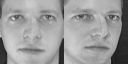

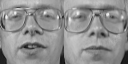

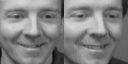

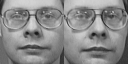

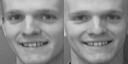

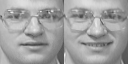

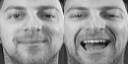

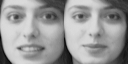

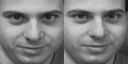

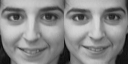

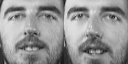

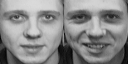

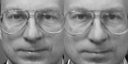

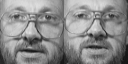

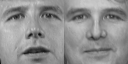

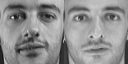

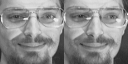

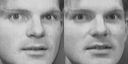

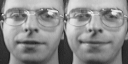

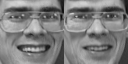

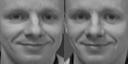

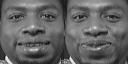

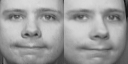

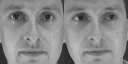

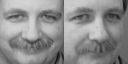

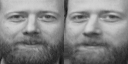

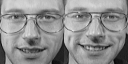

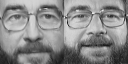

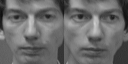

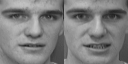

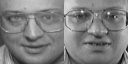

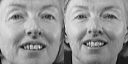

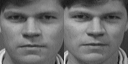

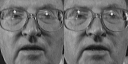

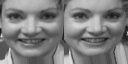

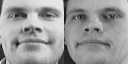

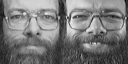

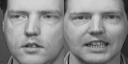

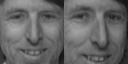

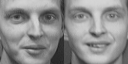

In [48]:
show_images(x_trainCNN2, N_IDENTITIES, GALLERY_SIZECNN2)

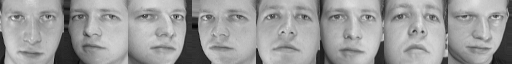

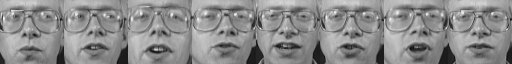

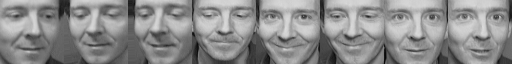

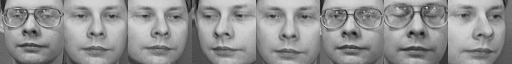

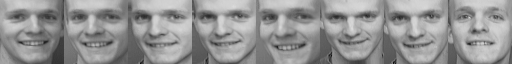

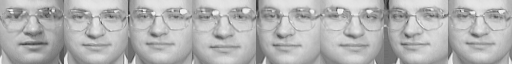

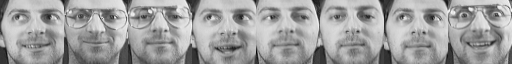

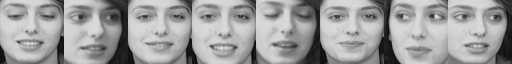

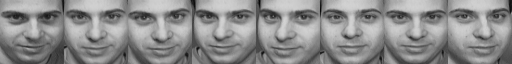

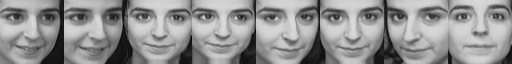

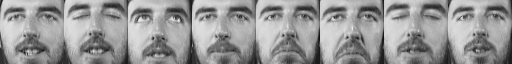

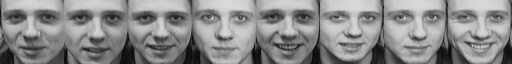

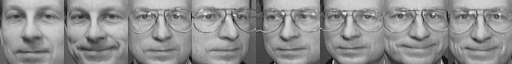

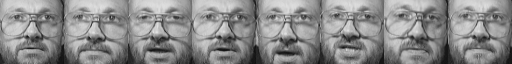

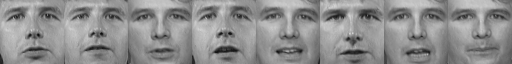

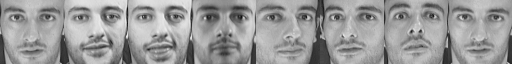

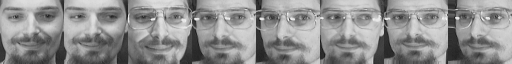

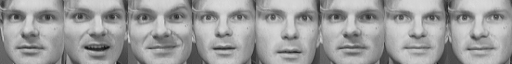

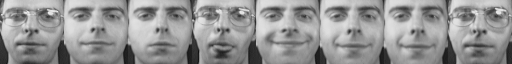

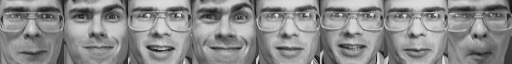

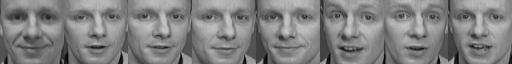

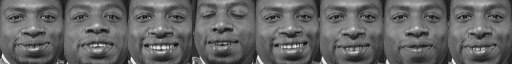

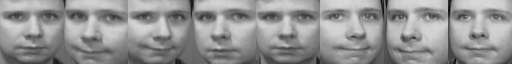

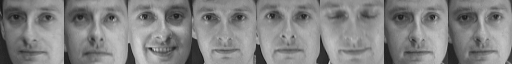

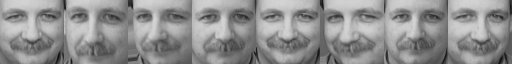

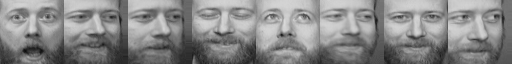

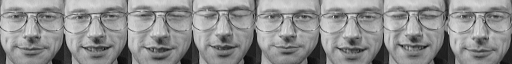

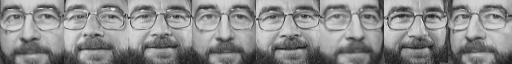

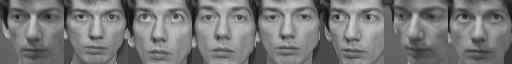

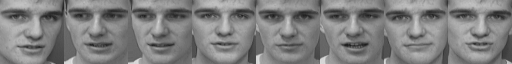

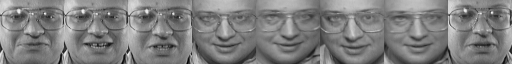

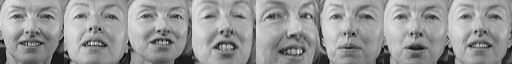

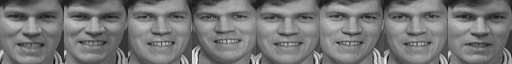

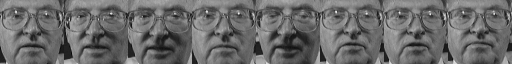

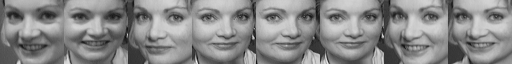

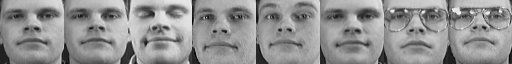

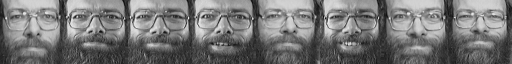

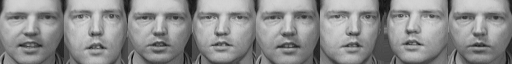

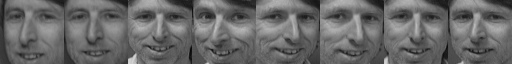

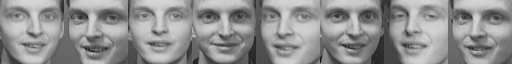

In [49]:
show_images(x_testCNN2, N_IDENTITIES, 10 - GALLERY_SIZECNN2)

## Split 50/50


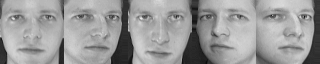

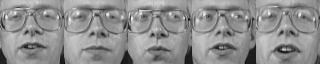

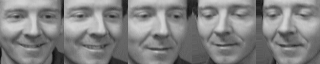

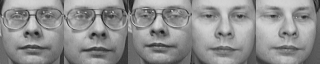

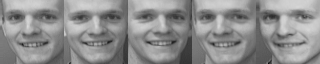

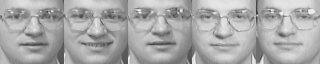

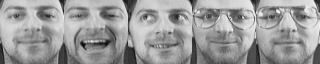

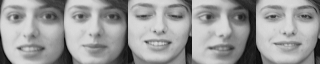

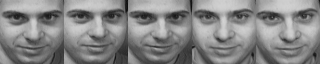

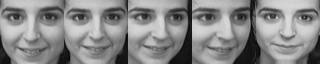

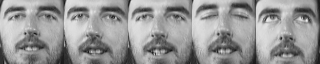

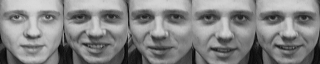

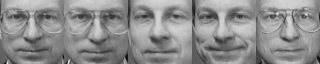

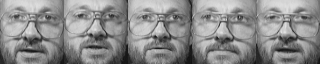

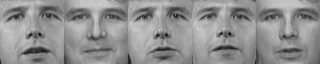

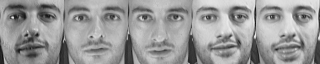

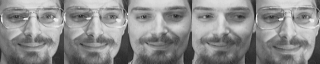

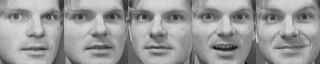

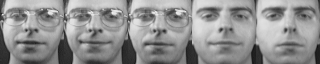

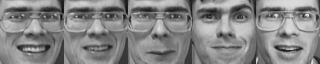

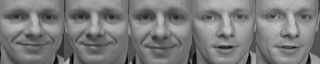

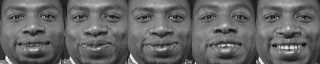

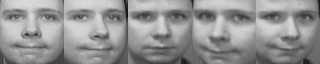

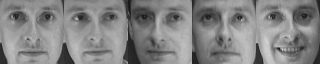

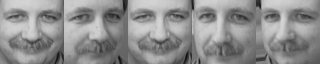

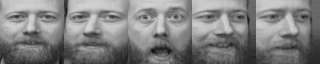

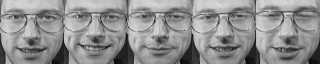

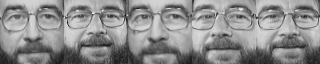

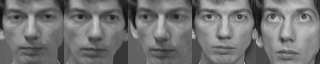

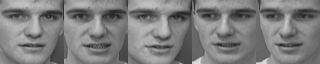

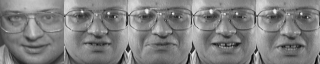

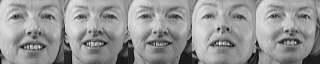

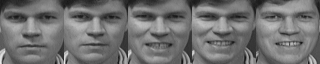

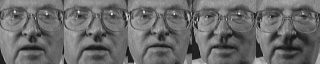

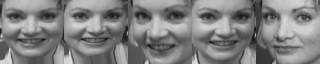

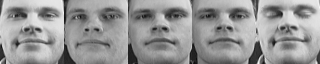

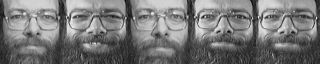

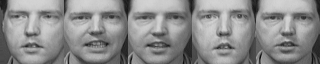

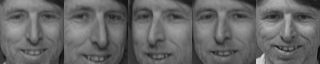

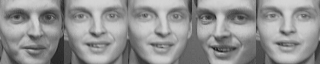

In [50]:
show_images(x_trainCNN5, N_IDENTITIES, GALLERY_SIZECNN5)

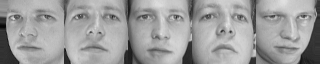

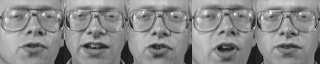

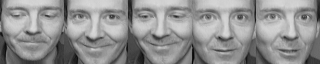

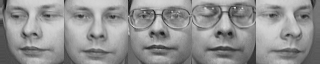

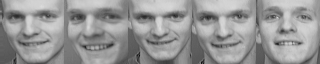

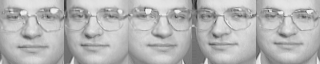

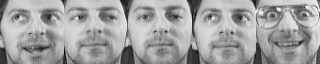

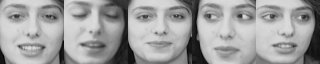

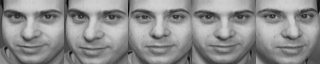

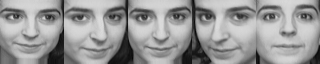

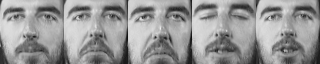

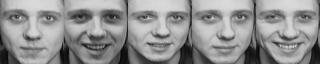

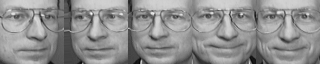

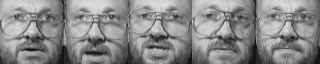

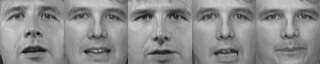

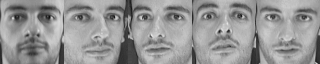

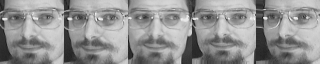

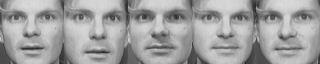

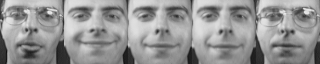

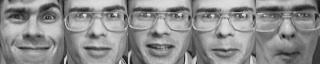

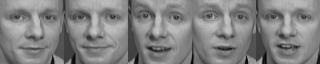

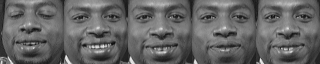

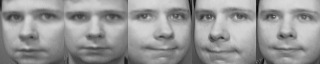

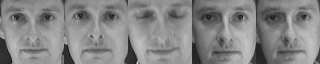

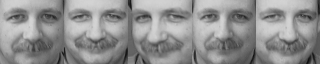

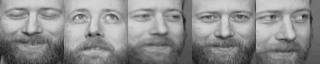

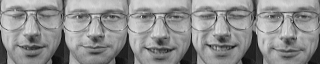

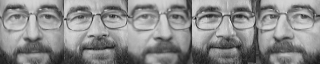

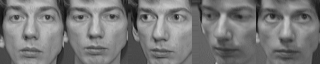

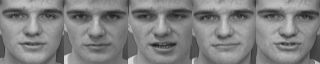

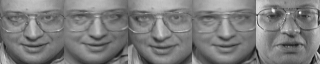

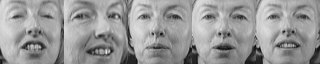

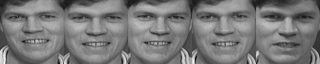

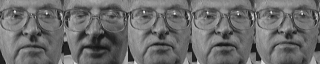

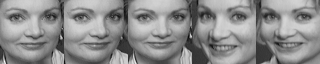

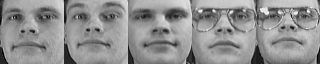

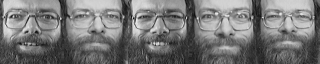

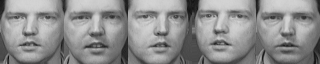

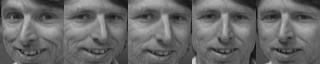

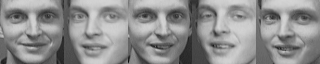

In [51]:
show_images(x_testCNN5, N_IDENTITIES, 10 - GALLERY_SIZECNN5)

## split 80/20

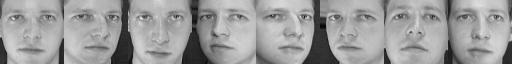

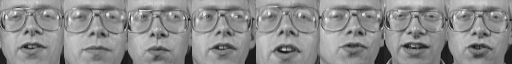

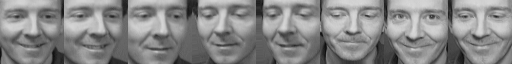

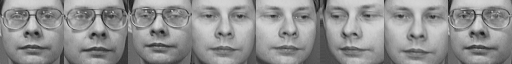

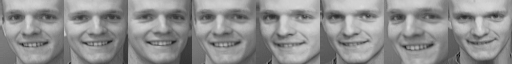

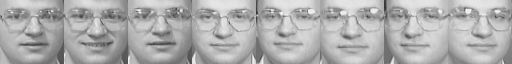

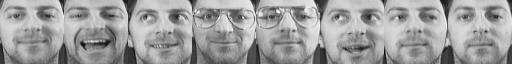

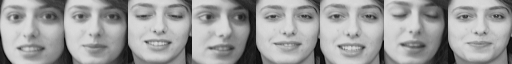

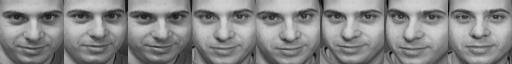

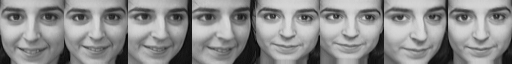

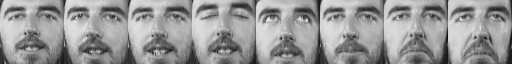

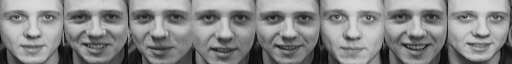

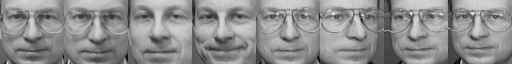

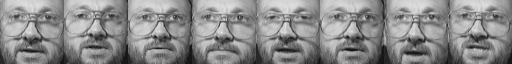

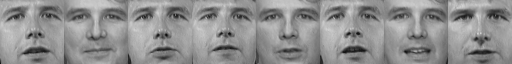

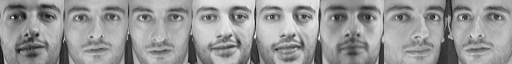

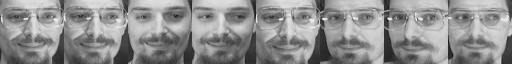

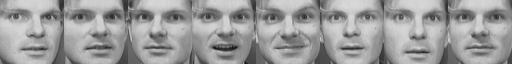

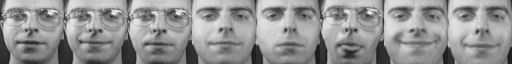

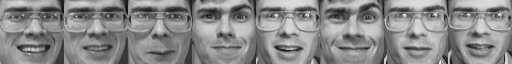

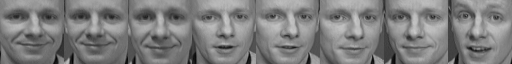

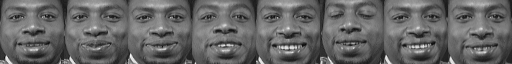

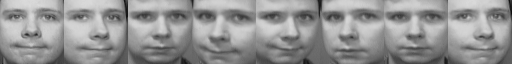

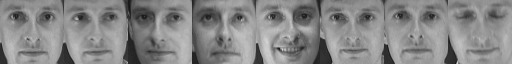

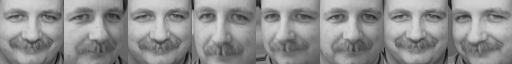

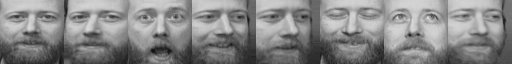

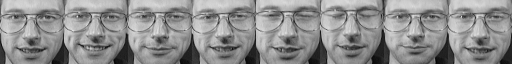

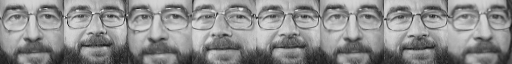

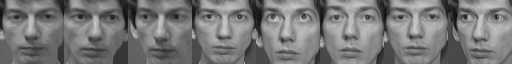

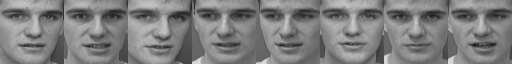

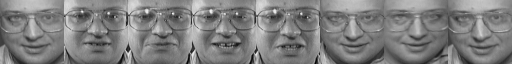

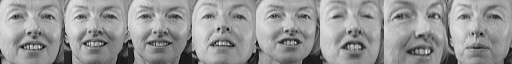

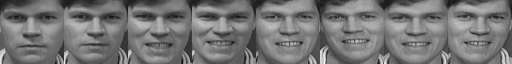

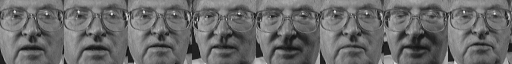

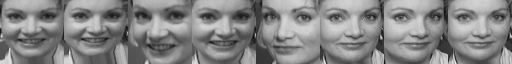

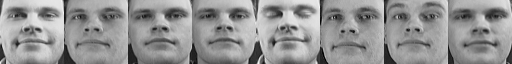

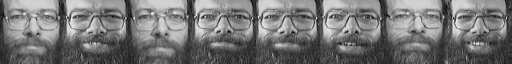

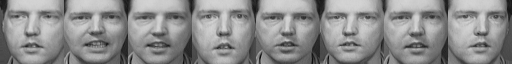

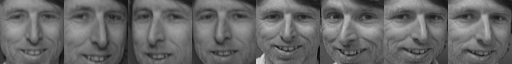

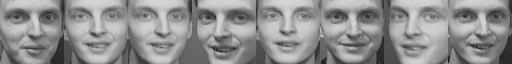

In [52]:
show_images(x_trainCNN8, N_IDENTITIES, GALLERY_SIZECNN8)

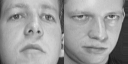

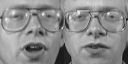

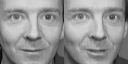

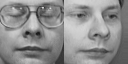

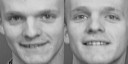

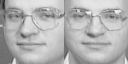

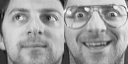

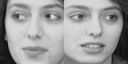

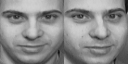

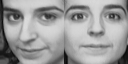

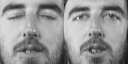

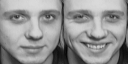

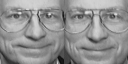

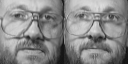

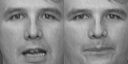

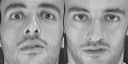

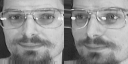

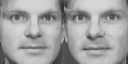

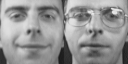

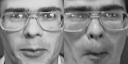

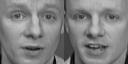

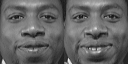

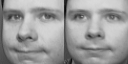

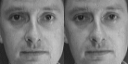

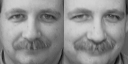

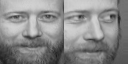

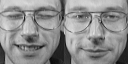

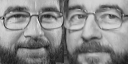

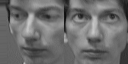

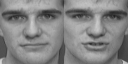

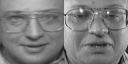

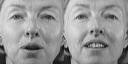

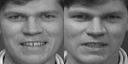

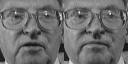

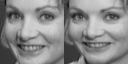

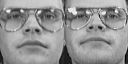

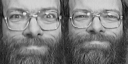

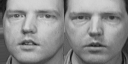

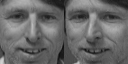

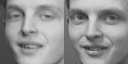

In [53]:
show_images(x_testCNN8, N_IDENTITIES, 10 - GALLERY_SIZECNN8)

# Run the experiments

Here is the code I used to get the results below!

## CNN Experiment

## 20/80

In [54]:
'''
# data normalization
# #images x height x width x #channels
#x_trainCNN2 = np.expand_dims(x_trainCNN5, 3)
#x_trainCNN2 = x_trainCNN2.astype(np.float32)
x_trainCNN2 /= 255

#x_testCNN2 = np.expand_dims(x_testCNN5, 3)
#x_testCNN2 = x_testCNN2.astype(np.float32)
x_testCNN2 /= 255

num_classes = 40

#y_trainCNN2 = np_utils.to_categorical(y_trainCNN2, 40)
#y_testCNN2 = np_utils.to_categorical(y_testCNN2, 40)
'''

'\n# data normalization\n# #images x height x width x #channels\n#x_trainCNN2 = np.expand_dims(x_trainCNN5, 3)\n#x_trainCNN2 = x_trainCNN2.astype(np.float32)\nx_trainCNN2 /= 255\n\n#x_testCNN2 = np.expand_dims(x_testCNN5, 3)\n#x_testCNN2 = x_testCNN2.astype(np.float32)\nx_testCNN2 /= 255\n\nnum_classes = 40\n\n#y_trainCNN2 = np_utils.to_categorical(y_trainCNN2, 40)\n#y_testCNN2 = np_utils.to_categorical(y_testCNN2, 40)\n'

In [55]:
num_classes = 40
y_trainCNN2 = np_utils.to_categorical(y_trainCNN2, num_classes)
y_testCNN2 = np_utils.to_categorical(y_testCNN2, num_classes)

In [56]:
print(x_trainCNN2.shape, y_trainCNN2.shape, x_trainCNN2.dtype, y_trainCNN2.dtype)
print(x_testCNN2.shape, y_testCNN2.shape)

(80, 64, 64, 1) (80, 40) float32 float32
(320, 64, 64, 1) (320, 40)


In [57]:
'''
shuffle = np.random.permutation(len(x_trainCNN2))

x_valCNN2 = x_trainCNN2.take(shuffle[:40], axis=0)
x_trainCNN2 = x_trainCNN2.take(shuffle[40:], axis=0)

y_valCNN2 = y_trainCNN2.take(shuffle[:40], axis=0)
y_trainCNN2 = y_trainCNN2.take(shuffle[40:], axis=0)

print(x_trainCNN2.shape, y_trainCNN2.shape, x_trainCNN2.dtype, y_trainCNN2.dtype)
print(x_valCNN2.shape, y_valCNN2.shape)
'''

'\nshuffle = np.random.permutation(len(x_trainCNN2))\n\nx_valCNN2 = x_trainCNN2.take(shuffle[:40], axis=0)\nx_trainCNN2 = x_trainCNN2.take(shuffle[40:], axis=0)\n\ny_valCNN2 = y_trainCNN2.take(shuffle[:40], axis=0)\ny_trainCNN2 = y_trainCNN2.take(shuffle[40:], axis=0)\n\nprint(x_trainCNN2.shape, y_trainCNN2.shape, x_trainCNN2.dtype, y_trainCNN2.dtype)\nprint(x_valCNN2.shape, y_valCNN2.shape)\n'

In [58]:


model2 = Sequential()
model2.add(Conv2D(16, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))  
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) 
model2.add(Conv2D(64, (3, 3), activation='relu')) 
model2.add(MaxPooling2D(pool_size=(2, 2)))                
model2.add(Dropout(0.10))  
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.10))                             
model2.add(Dense(40, activation='softmax'))

"""
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(64, 64, 1)))
model2.add(tf.keras.layers.MaxPool2D())
model2.add(tf.keras.layers.Conv2D(filters=24, kernel_size=(5, 5), activation='relu'))
model2.add(tf.keras.layers.MaxPool2D())
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units=64, activation='relu'))
model2.add(tf.keras.layers.Dense(units=32, activation='relu'))
model2.add(tf.keras.layers.Dense(units=16, activation = 'softmax'))
"""

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)        

In [59]:
learning_rate = 0.01
#loss_function = 'sparse_categorical_crossentropy'
loss_function = 'mse'
batch_size = 8
num_epochs = 25

In [60]:
model2.compile(optimizer= "adam", loss='mse', metrics=["accuracy"])
startTime = time.time()

history = model2.fit(x_trainCNN2, y_trainCNN2, batch_size=batch_size, epochs=num_epochs,
                    verbose=1, validation_data=(x_testCNN2, y_testCNN2))

score = model2.evaluate(x_testCNN2, y_testCNN2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))
model2.save_weights('model.hdf5')
model2.save("model.h5")

Epoch 1/25
10/10 [==============================] - 7s 25ms/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0244 - val_accuracy: 0.0344
Epoch 2/25
10/10 [==============================] - 0s 12ms/step - loss: 0.0244 - accuracy: 0.0125 - val_loss: 0.0244 - val_accuracy: 0.0250
Epoch 3/25
10/10 [==============================] - 0s 12ms/step - loss: 0.0244 - accuracy: 0.0000e+00 - val_loss: 0.0244 - val_accuracy: 0.0250
Epoch 4/25
10/10 [==============================] - 0s 12ms/step - loss: 0.0244 - accuracy: 0.0250 - val_loss: 0.0244 - val_accuracy: 0.0250
Epoch 5/25
10/10 [==============================] - 0s 12ms/step - loss: 0.0244 - accuracy: 0.0250 - val_loss: 0.0244 - val_accuracy: 0.0250
Epoch 6/25
10/10 [==============================] - 0s 12ms/step - loss: 0.0244 - accuracy: 0.0125 - val_loss: 0.0244 - val_accuracy: 0.0500
Epoch 7/25
10/10 [==============================] - 0s 12ms/step - loss: 0.0244 - accuracy: 0.0875 - val_loss: 0.0244 - val_accuracy: 0.0250
Epoch

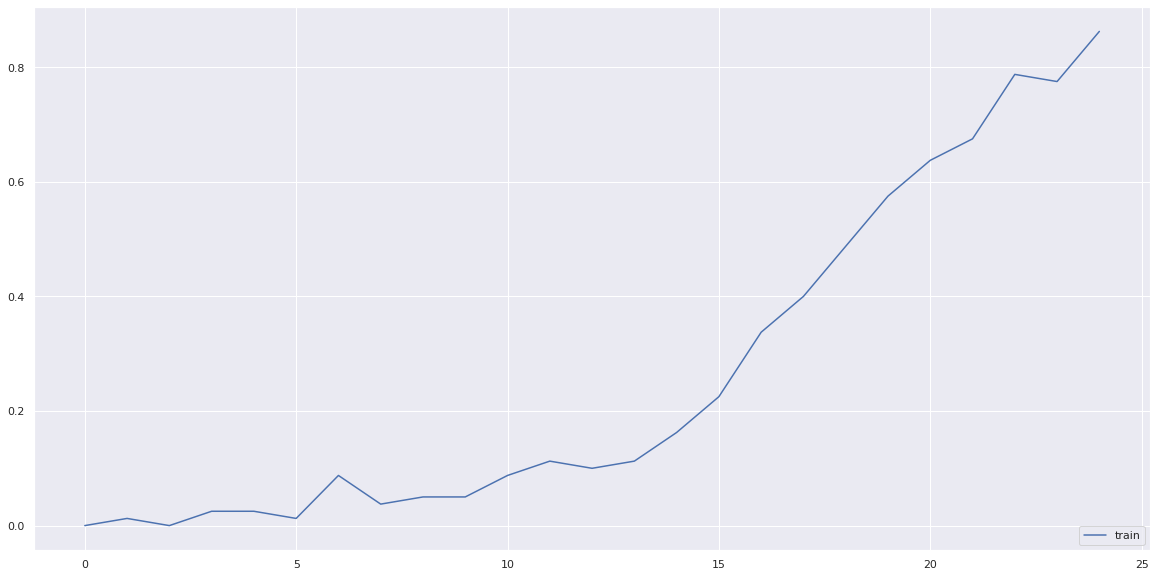

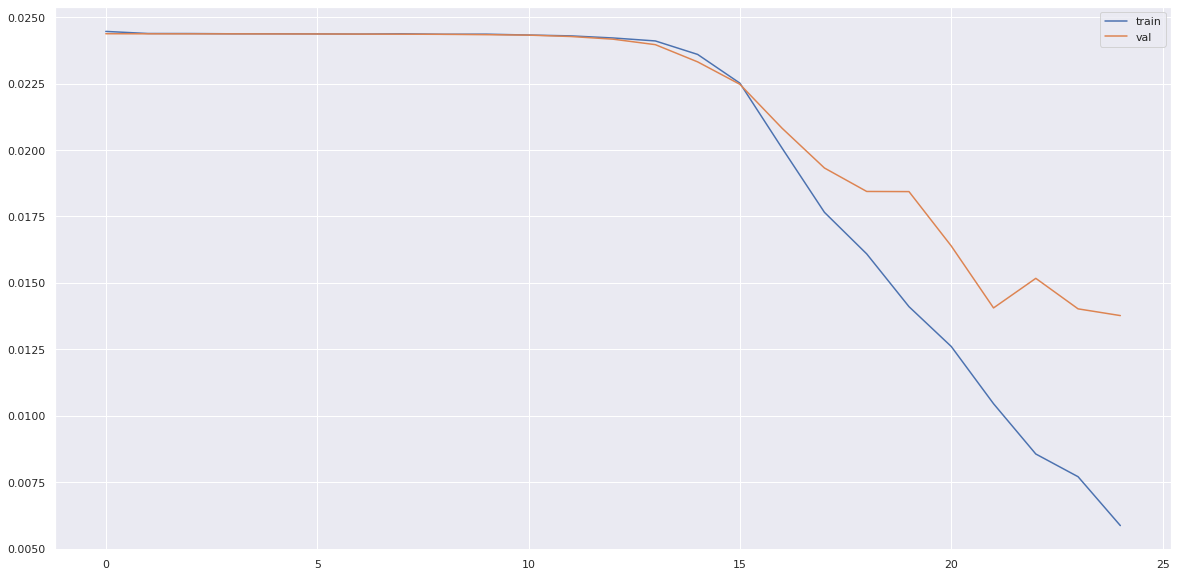

TRAINING SET
Loss: 0.0040782755240798 
Accuracy: 0.8999999761581421

VALIDATION SET
Loss: 0.0040782755240798 
Accuracy: 0.8999999761581421

TEST SET
Loss: 0.013769532553851604 
Accuracy: 0.5687500238418579


In [62]:
plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
#plt.ylabel("acc")
#plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.ylabel('loss')
#plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# restore weights from the best training point
#model2.load_weights('best_model.h5')

scores = model2.evaluate(x_trainCNN2, y_trainCNN2, verbose=0)
print('TRAINING SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

#scores = model2.evaluate(x_valCNN2, y_valCNN2, verbose=0)
print('\nVALIDATION SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model2.evaluate(x_testCNN2, y_testCNN2, verbose=0)
print('\nTEST SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

10/10 [==============================] - 0s 2ms/step


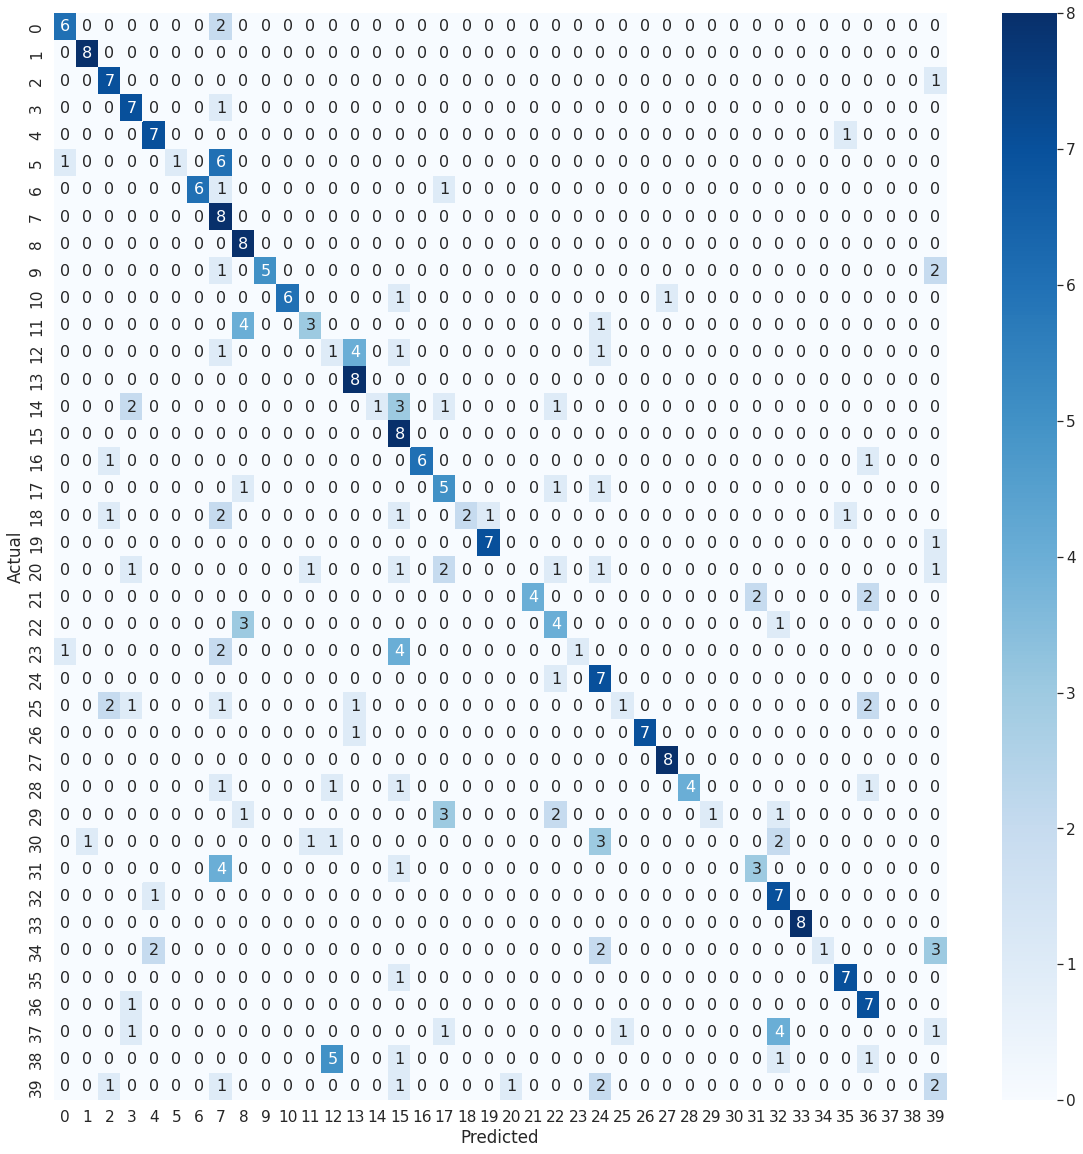

In [64]:

y_true = np.argmax(y_testCNN2, axis=1)
y_pred = np.argmax(model2.predict(x_testCNN2), axis=1)
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (20,20))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

Augmented

Epoch 1/25
10/10 [==============================] - 1s 31ms/step - loss: 0.0278 - accuracy: 0.0375 - val_loss: 0.0244 - val_accuracy: 0.0312
Epoch 2/25
10/10 [==============================] - 0s 12ms/step - loss: 0.0244 - accuracy: 0.0000e+00 - val_loss: 0.0244 - val_accuracy: 0.0219
Epoch 3/25
10/10 [==============================] - 0s 10ms/step - loss: 0.0244 - accuracy: 0.0125 - val_loss: 0.0244 - val_accuracy: 0.0219
Epoch 4/25
10/10 [==============================] - 0s 9ms/step - loss: 0.0244 - accuracy: 0.0125 - val_loss: 0.0244 - val_accuracy: 0.0250
Epoch 4: early stopping


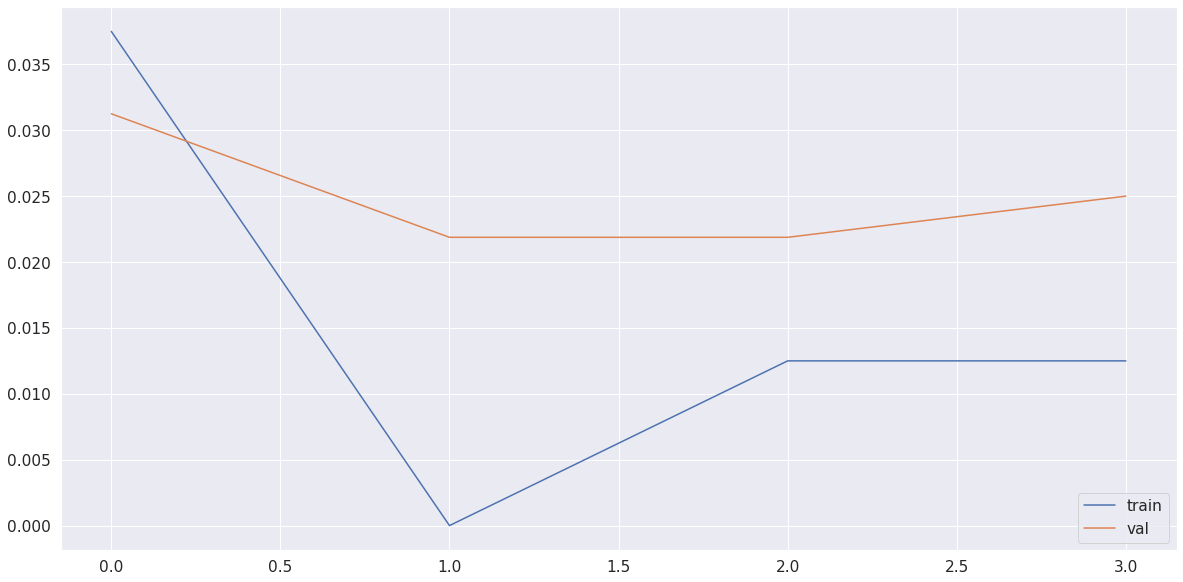

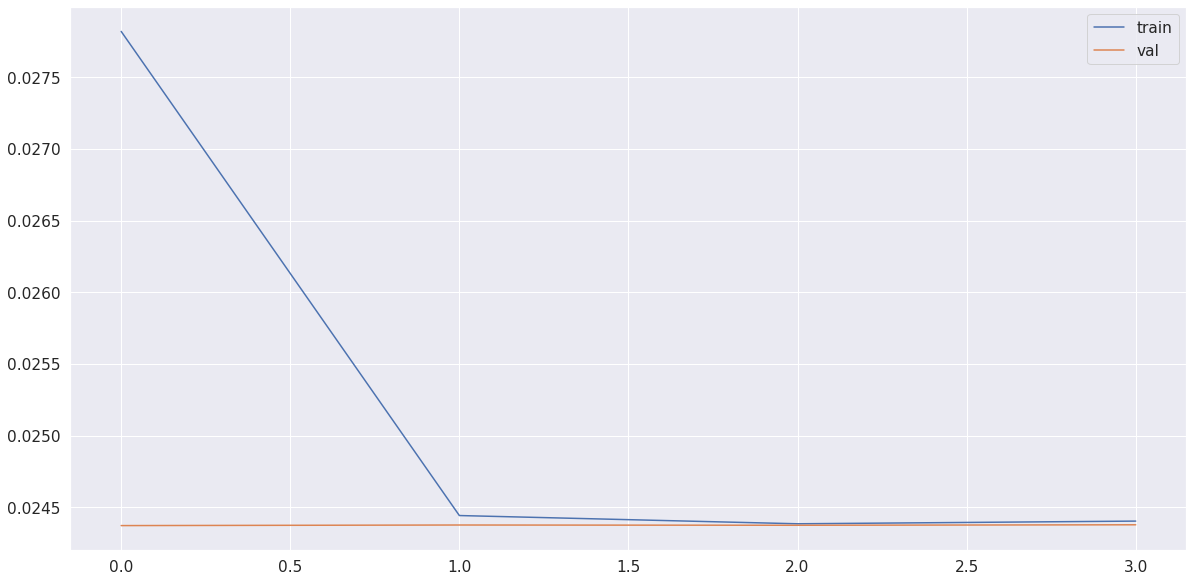

TRAINING SET
Loss: 0.024371232837438583 
Accuracy: 0.03750000149011612

TEST SET
Loss: 0.02437274158000946 
Accuracy: 0.03125


In [65]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  featurewise_center = False,            # set input mean to 0 over the dataset
  samplewise_center = False,             # set each sample mean to 0
  featurewise_std_normalization = False, # divide inputs by std of the dataset
  samplewise_std_normalization = False,  # divide each input by its std
  zca_whitening = False,                 # apply ZCA whitening
  zca_epsilon = 1e-06,                   # epsilon for ZCA whitening
  rotation_range = 5,                    # randomly rotate images in the range (degrees, 0 to 180)
  width_shift_range = 0.1,               # randomly shift images horizontally (fraction of total width)
  height_shift_range = 0.1,              # randomly shift images vertically (fraction of total height)
  shear_range = 0.,                      # set range for random shear
  zoom_range = 0.1,                      # set range for random zoom
  channel_shift_range = 0.,              # set range for random channel shifts
  fill_mode = 'nearest',                 # set mode for filling points outside the input boundaries
  cval = 0.,                             # value used for fill_mode = "constant"
  horizontal_flip = False,               # randomly flip images
  vertical_flip = False,                 # randomly flip images
  rescale = None,                        # set rescaling factor (applied before any other transformation)
  preprocessing_function = None,         # set function that will be applied on each input
  data_format = None,                    # image data format, either "channels_first" or "channels_last"
  validation_split = 0.0                 # fraction of images reserved for validation (strictly between 0 and 1)
)
datagen.fit(x_trainCNN2)

# training configuration
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model2.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=3, verbose=1)
model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

#train
steps_for_epoch = np.ceil(x_trainCNN2.shape[0] / batch_size)
history = model2.fit(datagen.flow(x_trainCNN2, y_trainCNN2, batch_size=batch_size), steps_per_epoch = steps_for_epoch, epochs=num_epochs, validation_data=(x_testCNN2, y_testCNN2), workers=4, callbacks=[early_stop, model_save])


plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.ylabel('loss')
#plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# restore weights from the best training point
model2.load_weights('best_model.h5')

scores = model2.evaluate(x_trainCNN2, y_trainCNN2, verbose=0)
print('TRAINING SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

#scores = model5.evaluate(x_val, y_val, verbose=0)
#print('\nVALIDATION SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model2.evaluate(x_testCNN2, y_testCNN2, verbose=0)
print('\nTEST SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

## 50/50

In [66]:

#x_trainCNN5 /= 255
#x_testCNN5 /= 255

# data normalization
# #images x height x width x #channels
#x_trainCNN2 = np.expand(x_trainCNN5, 3)
#x_trainCNN2 = x_trainCNN2.astype(np.float32)
#x_trainCNN2 /= 255

#x_testCNN2 = np.expand_dims(x_testCNN5, 3)
#x_testCNN2 = x_testCNN2.astype(np.float32)
#_testCNN2 /= 255

#y_trainCNN5 = np.squeeze(y_trainCNN5, 1)
#y_testCNN5 = np.squeeze(y_trainCNN5, 1)


num_classes = 40
y_trainCNN5 = np_utils.to_categorical(y_trainCNN5, num_classes)
y_testCNN5 = np_utils.to_categorical(y_testCNN5, num_classes)

In [67]:
print(x_trainCNN5.shape, y_trainCNN5.shape, x_trainCNN5.dtype, y_trainCNN5.dtype)
print(x_testCNN5.shape, y_testCNN5.shape)

print(x_trainCNN5.shape)
print(y_trainCNN5.shape)

(200, 64, 64, 1) (200, 40) float32 float32
(200, 64, 64, 1) (200, 40)
(200, 64, 64, 1)
(200, 40)


In [68]:


model5 = Sequential()
model5.add(Conv2D(16, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))  
model5.add(Conv2D(32, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2))) 
model5.add(Conv2D(64, (3, 3), activation='relu')) 
model5.add(MaxPooling2D(pool_size=(2, 2)))                
model5.add(Dropout(0.10))  
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.10))                             
model5.add(Dense(40, activation='softmax'))


print(model5.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)        

In [69]:
learning_rate = 0.001
#loss_function = 'sparse_categorical_crossentropy'
loss_function = 'mse'
batch_size = 8
num_epochs = 25

In [70]:
model5.compile(optimizer= "adam", loss='mse', metrics=["accuracy"])
startTime = time.time()

history = model5.fit(x_trainCNN5, y_trainCNN5, batch_size=batch_size, epochs=num_epochs,
                    verbose=1, validation_data=(x_testCNN5, y_testCNN5))

score = model5.evaluate(x_testCNN5, y_testCNN5, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))
model5.save_weights('model.hdf5')
model5.save("model.h5")

Epoch 1/25
25/25 [==============================] - 1s 10ms/step - loss: 0.0244 - accuracy: 0.0100 - val_loss: 0.0244 - val_accuracy: 0.0250
Epoch 2/25
25/25 [==============================] - 0s 6ms/step - loss: 0.0244 - accuracy: 0.0100 - val_loss: 0.0244 - val_accuracy: 0.0250
Epoch 3/25
25/25 [==============================] - 0s 6ms/step - loss: 0.0244 - accuracy: 0.0350 - val_loss: 0.0244 - val_accuracy: 0.0250
Epoch 4/25
25/25 [==============================] - 0s 6ms/step - loss: 0.0244 - accuracy: 0.0300 - val_loss: 0.0244 - val_accuracy: 0.0750
Epoch 5/25
25/25 [==============================] - 0s 6ms/step - loss: 0.0244 - accuracy: 0.0400 - val_loss: 0.0244 - val_accuracy: 0.0650
Epoch 6/25
25/25 [==============================] - 0s 6ms/step - loss: 0.0244 - accuracy: 0.0350 - val_loss: 0.0244 - val_accuracy: 0.0500
Epoch 7/25
25/25 [==============================] - 0s 6ms/step - loss: 0.0244 - accuracy: 0.0400 - val_loss: 0.0243 - val_accuracy: 0.0700
Epoch 8/25
25/25 [=

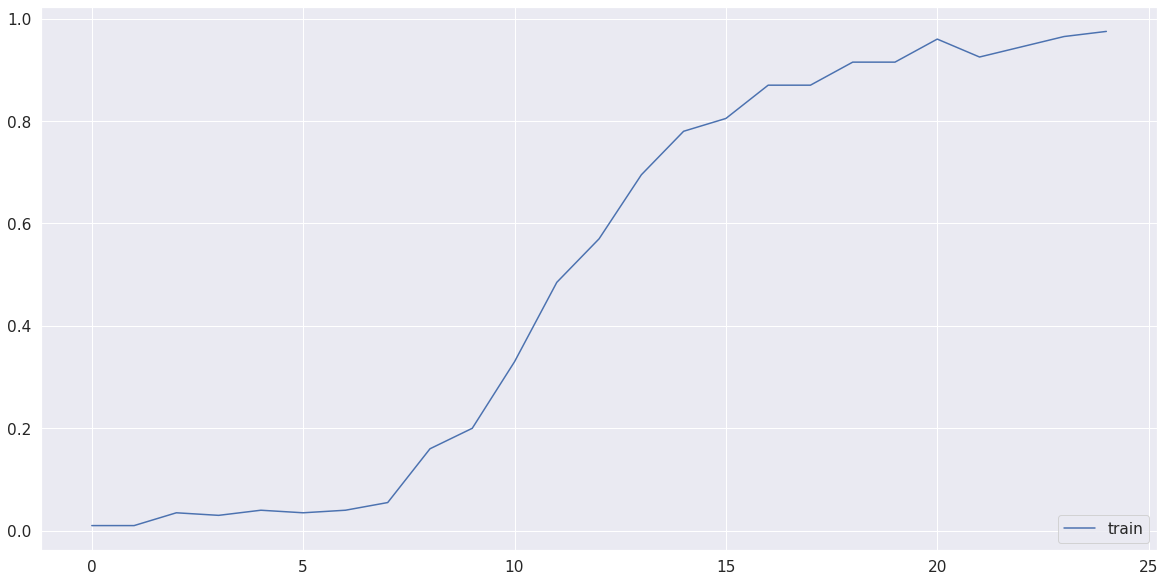

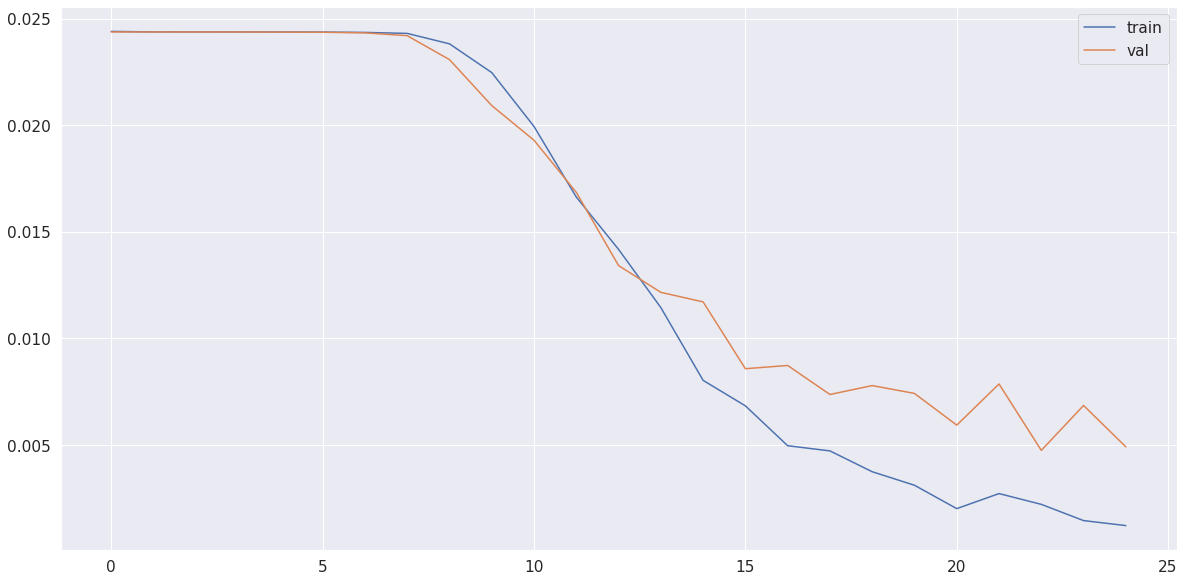

TRAINING SET
Loss: 0.0006454064860008657 
Accuracy: 0.9900000095367432

TEST SET
Loss: 0.0049170092679560184 
Accuracy: 0.8650000095367432


In [71]:
plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
#plt.ylabel("acc")
#plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.ylabel('loss')
#plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# restore weights from the best training point
#model2.load_weights('best_model.h5')

scores = model5.evaluate(x_trainCNN5, y_trainCNN5, verbose=0)
print('TRAINING SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

#scores = model5.evaluate(x_valCNN5, y_valCNN5, verbose=0)
#print('\nVALIDATION SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model5.evaluate(x_testCNN5, y_testCNN5, verbose=0)
print('\nTEST SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

7/7 [==============================] - 0s 2ms/step


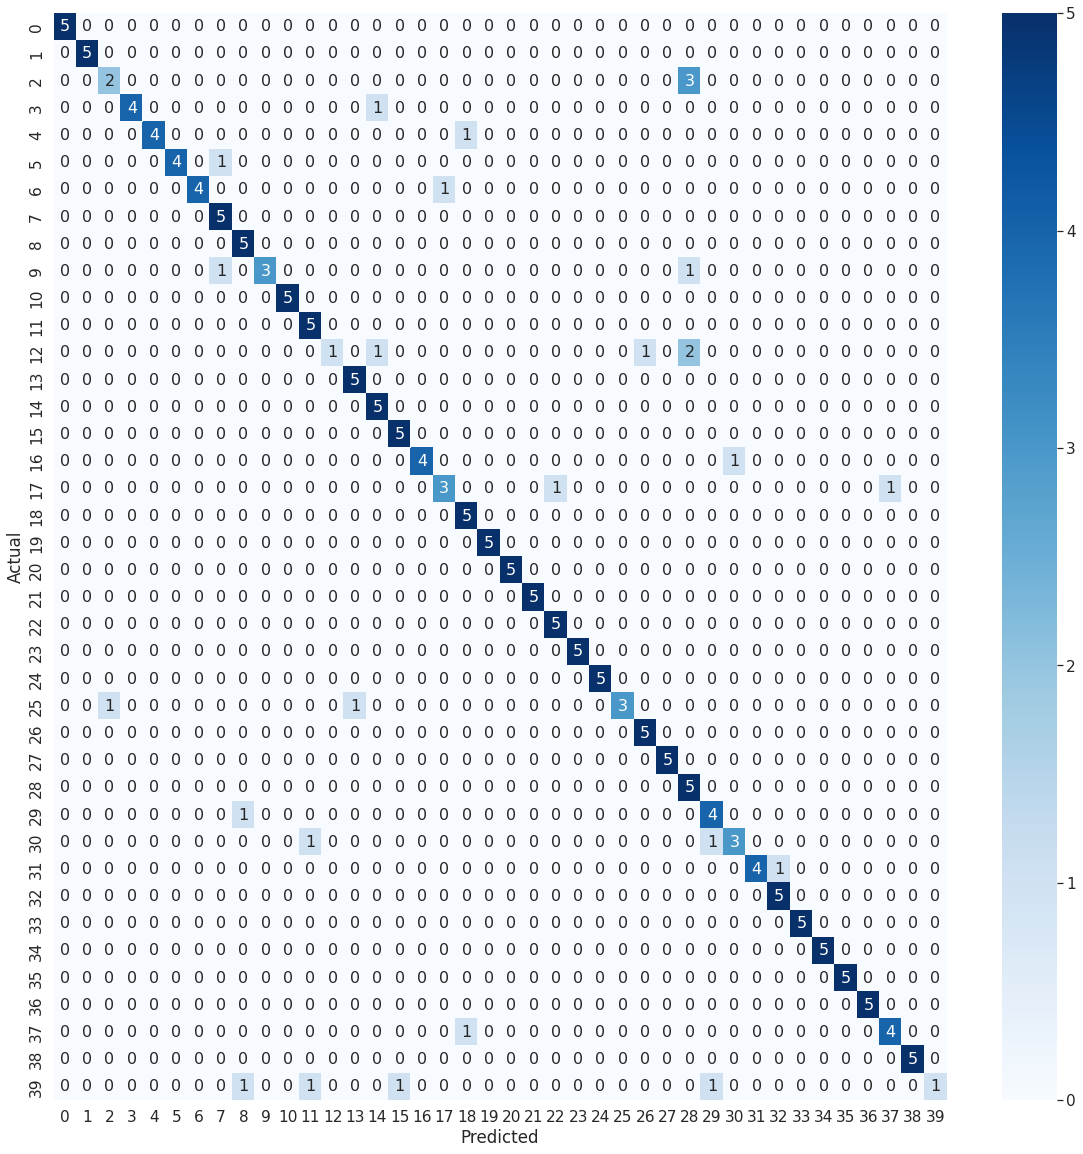

In [72]:

y_true = np.argmax(y_testCNN5, axis=1)
y_pred = np.argmax(model5.predict(x_testCNN5), axis=1)
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (20,20))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

Augmented

Epoch 1/25
25/25 [==============================] - 1s 17ms/step - loss: 0.0211 - accuracy: 0.3950 - val_loss: 0.0094 - val_accuracy: 0.7450
Epoch 2/25
25/25 [==============================] - 0s 12ms/step - loss: 0.0156 - accuracy: 0.5250 - val_loss: 0.0076 - val_accuracy: 0.8000
Epoch 3/25
25/25 [==============================] - 0s 11ms/step - loss: 0.0182 - accuracy: 0.4800 - val_loss: 0.0070 - val_accuracy: 0.8350
Epoch 4/25
25/25 [==============================] - 0s 11ms/step - loss: 0.0159 - accuracy: 0.5100 - val_loss: 0.0064 - val_accuracy: 0.8450
Epoch 5/25
25/25 [==============================] - 0s 10ms/step - loss: 0.0159 - accuracy: 0.5050 - val_loss: 0.0058 - val_accuracy: 0.8550
Epoch 6/25
25/25 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 0.5550 - val_loss: 0.0070 - val_accuracy: 0.8100
Epoch 7/25
25/25 [==============================] - 0s 8ms/step - loss: 0.0153 - accuracy: 0.5500 - val_loss: 0.0071 - val_accuracy: 0.8000
Epoch 8/25
25/2

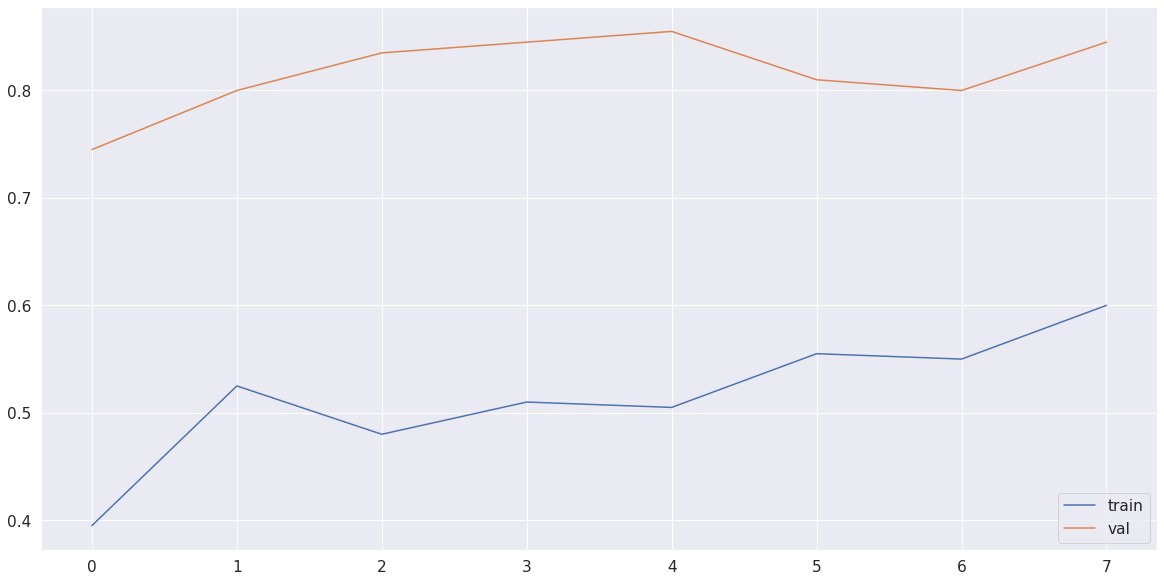

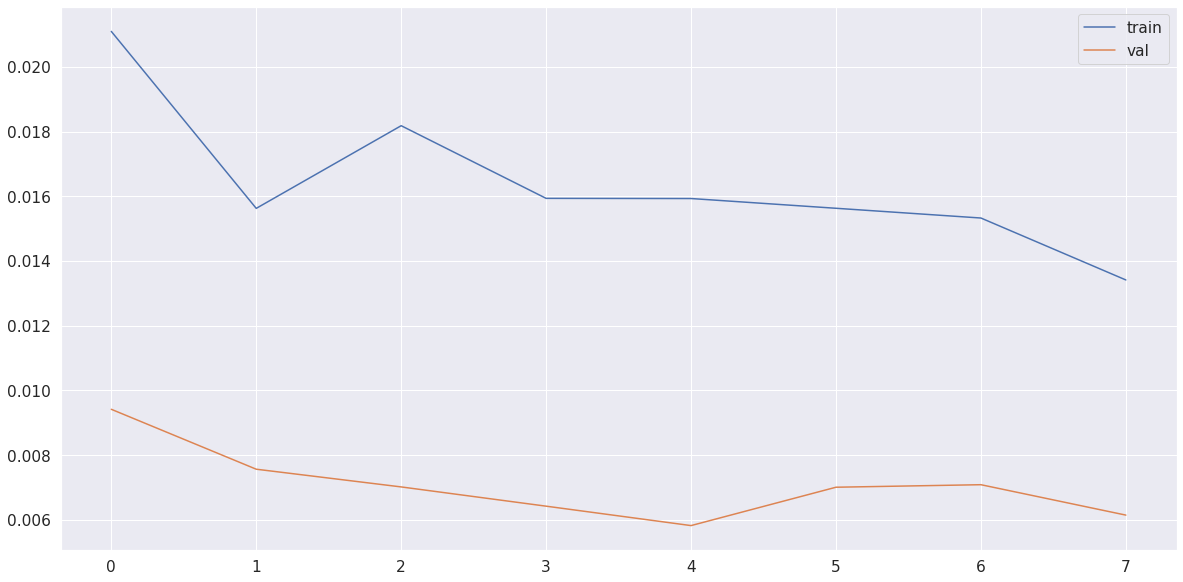

TRAINING SET
Loss: 0.001206772169098258 
Accuracy: 0.9800000190734863

TEST SET
Loss: 0.005823342129588127 
Accuracy: 0.8550000190734863


In [73]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  featurewise_center = False,            # set input mean to 0 over the dataset
  samplewise_center = False,             # set each sample mean to 0
  featurewise_std_normalization = False, # divide inputs by std of the dataset
  samplewise_std_normalization = False,  # divide each input by its std
  zca_whitening = False,                 # apply ZCA whitening
  zca_epsilon = 1e-06,                   # epsilon for ZCA whitening
  rotation_range = 5,                    # randomly rotate images in the range (degrees, 0 to 180)
  width_shift_range = 0.1,               # randomly shift images horizontally (fraction of total width)
  height_shift_range = 0.1,              # randomly shift images vertically (fraction of total height)
  shear_range = 0.,                      # set range for random shear
  zoom_range = 0.1,                      # set range for random zoom
  channel_shift_range = 0.,              # set range for random channel shifts
  fill_mode = 'nearest',                 # set mode for filling points outside the input boundaries
  cval = 0.,                             # value used for fill_mode = "constant"
  horizontal_flip = False,               # randomly flip images
  vertical_flip = False,                 # randomly flip images
  rescale = None,                        # set rescaling factor (applied before any other transformation)
  preprocessing_function = None,         # set function that will be applied on each input
  data_format = None,                    # image data format, either "channels_first" or "channels_last"
  validation_split = 0.0                 # fraction of images reserved for validation (strictly between 0 and 1)
)
datagen.fit(x_trainCNN5)

# training configuration
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model5.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=3, verbose=1)
model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

#train
steps_for_epoch = np.ceil(x_trainCNN5.shape[0] / batch_size)
history = model5.fit(datagen.flow(x_trainCNN5, y_trainCNN5, batch_size=batch_size), steps_per_epoch = steps_for_epoch, epochs=num_epochs, validation_data=(x_testCNN5, y_testCNN5), workers=4, callbacks=[early_stop, model_save])


plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.ylabel('loss')
#plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# restore weights from the best training point
model5.load_weights('best_model.h5')

scores = model5.evaluate(x_trainCNN5, y_trainCNN5, verbose=0)
print('TRAINING SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

#scores = model5.evaluate(x_val, y_val, verbose=0)
#print('\nVALIDATION SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model5.evaluate(x_testCNN5, y_testCNN5, verbose=0)
print('\nTEST SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

## 80/20 split


In [74]:

#x_trainCNN5 /= 255
#x_testCNN5 /= 255

# data normalization
# #images x height x width x #channels
#x_trainCNN2 = np.expand(x_trainCNN5, 3)
#x_trainCNN2 = x_trainCNN2.astype(np.float32)
#x_trainCNN2 /= 255

#x_testCNN2 = np.expand_dims(x_testCNN5, 3)
#x_testCNN2 = x_testCNN2.astype(np.float32)
#_testCNN2 /= 255

#y_trainCNN8 = np.squeeze(y_trainCNN5, 1)
#y_testCNN8 = np.squeeze(y_trainCNN5, 1)


num_classes = 40
y_trainCNN8 = np_utils.to_categorical(y_trainCNN8, num_classes)
y_testCNN8 = np_utils.to_categorical(y_testCNN8, num_classes)

In [75]:
print(x_trainCNN8.shape, y_trainCNN8.shape, x_trainCNN8.dtype, y_trainCNN8.dtype)
print(x_testCNN8.shape, y_testCNN8.shape)

print(x_trainCNN5.shape)
print(y_trainCNN5.shape)

(320, 64, 64, 1) (320, 40) float32 float32
(80, 64, 64, 1) (80, 40)
(200, 64, 64, 1)
(200, 40)


In [76]:


model8 = Sequential()
model8.add(Conv2D(16, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))  
model8.add(Conv2D(32, (3, 3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2))) 
model8.add(Conv2D(64, (3, 3), activation='relu')) 
model8.add(MaxPooling2D(pool_size=(2, 2)))                
model8.add(Dropout(0.10))  
model8.add(Flatten())
model8.add(Dense(128, activation='relu'))
model8.add(Dropout(0.10))                             
model8.add(Dense(40, activation='softmax'))


print(model8.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)        

In [77]:
learning_rate = 0.0001
#loss_function = 'sparse_categorical_crossentropy'
loss_function = 'mse'
batch_size = 8
num_epochs = 25

In [78]:
model8.compile(optimizer= "adam", loss='mse', metrics=["accuracy"])
startTime = time.time()

history = model8.fit(x_trainCNN8, y_trainCNN8, batch_size=batch_size, epochs=num_epochs,
                    verbose=1, validation_data=(x_testCNN8, y_testCNN8))

score = model8.evaluate(x_testCNN8, y_testCNN8, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))
model8.save_weights('model.hdf5')
model8.save("model.h5")

Epoch 1/25
40/40 [==============================] - 1s 7ms/step - loss: 0.0244 - accuracy: 0.0188 - val_loss: 0.0244 - val_accuracy: 0.0125
Epoch 2/25
40/40 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.0250 - val_loss: 0.0244 - val_accuracy: 0.0375
Epoch 3/25
40/40 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.0250 - val_loss: 0.0244 - val_accuracy: 0.0375
Epoch 4/25
40/40 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.0437 - val_loss: 0.0243 - val_accuracy: 0.0375
Epoch 5/25
40/40 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 0.0750 - val_loss: 0.0238 - val_accuracy: 0.1750
Epoch 6/25
40/40 [==============================] - 0s 4ms/step - loss: 0.0229 - accuracy: 0.1906 - val_loss: 0.0213 - val_accuracy: 0.3625
Epoch 7/25
40/40 [==============================] - 0s 4ms/step - loss: 0.0191 - accuracy: 0.3750 - val_loss: 0.0151 - val_accuracy: 0.5000
Epoch 8/25
40/40 [==

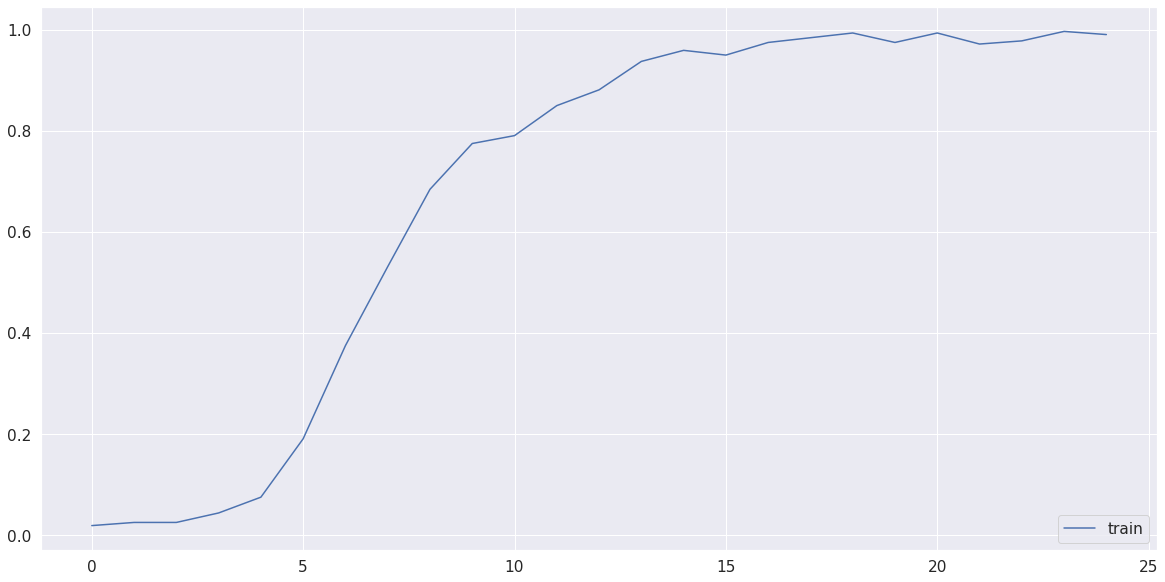

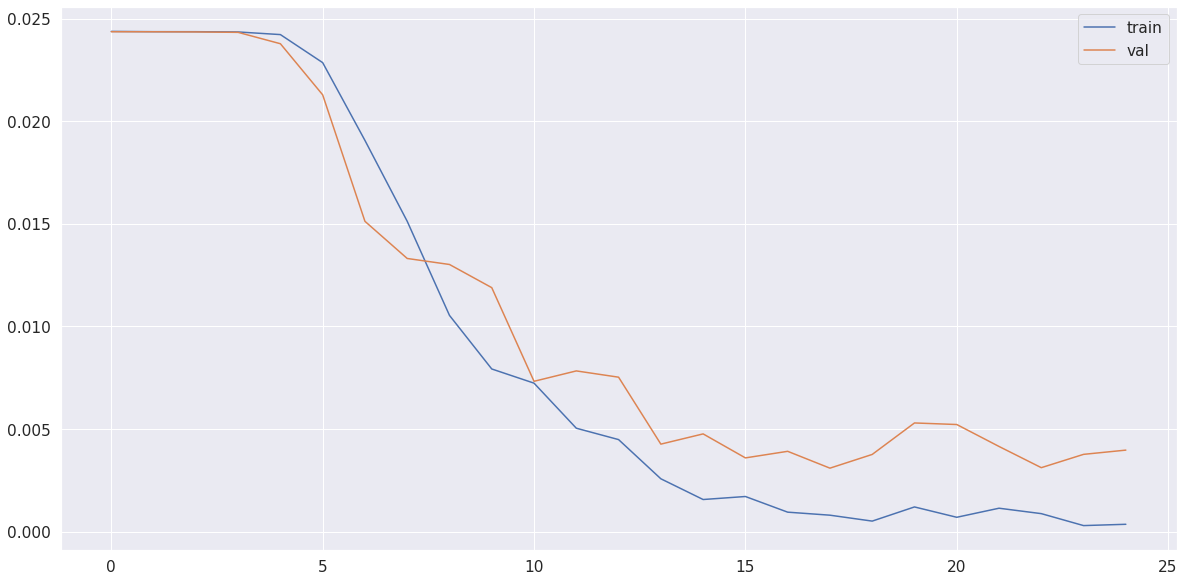

TRAINING SET
Loss: 3.25015680573415e-05 
Accuracy: 1.0

TEST SET
Loss: 0.003971131052821875 
Accuracy: 0.887499988079071


In [79]:
plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
#plt.ylabel("acc")
#plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.ylabel('loss')
#plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# restore weights from the best training point
#model2.load_weights('best_model.h5')

scores = model8.evaluate(x_trainCNN8, y_trainCNN8, verbose=0)
print('TRAINING SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

#scores = model5.evaluate(x_valCNN5, y_valCNN5, verbose=0)
#print('\nVALIDATION SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model8.evaluate(x_testCNN8, y_testCNN8, verbose=0)
print('\nTEST SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

3/3 [==============================] - 0s 3ms/step


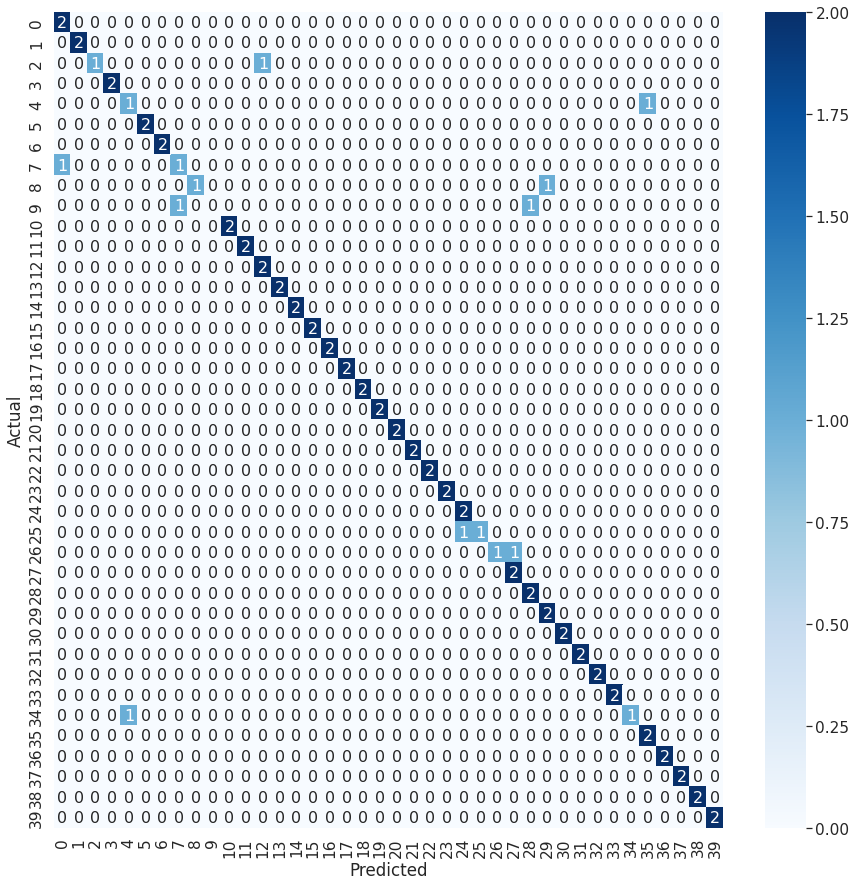

In [80]:

y_true = np.argmax(y_testCNN8, axis=1)
y_pred = np.argmax(model8.predict(x_testCNN8), axis=1)
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

Augmented

Epoch 1/25
40/40 [==============================] - 1s 12ms/step - loss: 0.0203 - accuracy: 0.4531 - val_loss: 0.0034 - val_accuracy: 0.9125
Epoch 2/25
40/40 [==============================] - 0s 8ms/step - loss: 0.0203 - accuracy: 0.4437 - val_loss: 0.0033 - val_accuracy: 0.9250
Epoch 3/25
40/40 [==============================] - 0s 7ms/step - loss: 0.0183 - accuracy: 0.5000 - val_loss: 0.0032 - val_accuracy: 0.9250
Epoch 4/25
40/40 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 0.4812 - val_loss: 0.0033 - val_accuracy: 0.9250
Epoch 5/25
40/40 [==============================] - 0s 7ms/step - loss: 0.0169 - accuracy: 0.5156 - val_loss: 0.0032 - val_accuracy: 0.9250
Epoch 5: early stopping


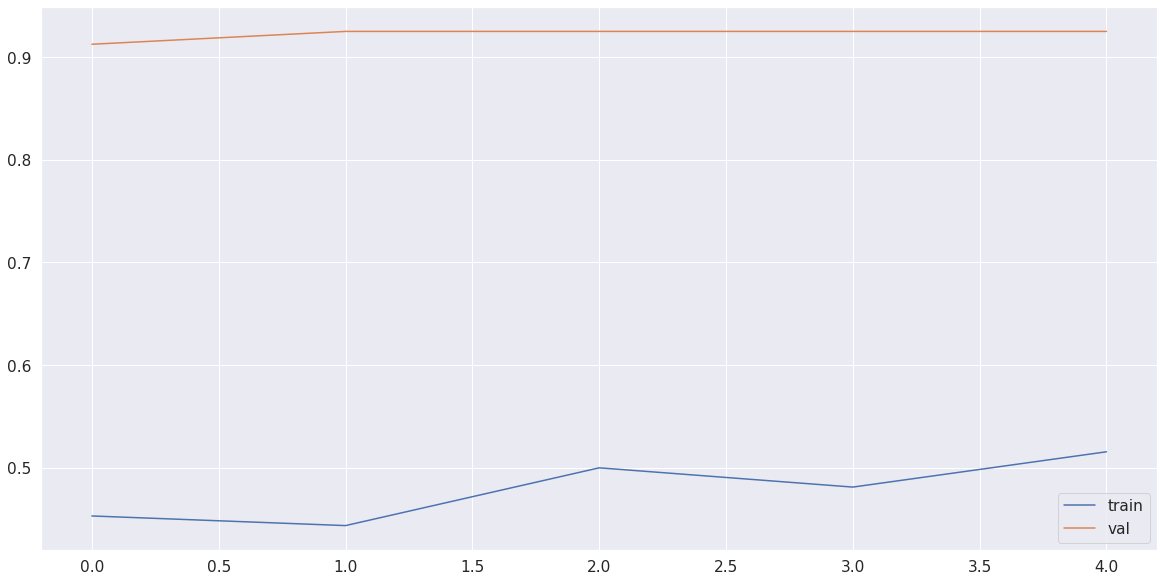

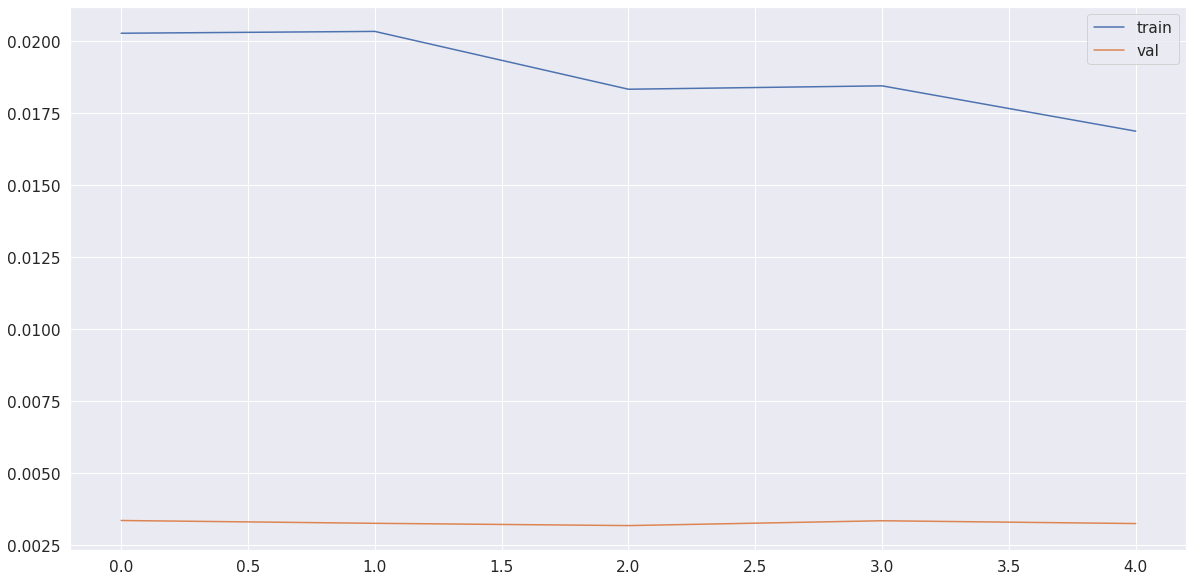

TRAINING SET
Loss: 1.6835276255733334e-05 
Accuracy: 1.0

TEST SET
Loss: 0.003258360084146261 
Accuracy: 0.925000011920929


In [81]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  featurewise_center = False,            # set input mean to 0 over the dataset
  samplewise_center = False,             # set each sample mean to 0
  featurewise_std_normalization = False, # divide inputs by std of the dataset
  samplewise_std_normalization = False,  # divide each input by its std
  zca_whitening = False,                 # apply ZCA whitening
  zca_epsilon = 1e-06,                   # epsilon for ZCA whitening
  rotation_range = 5,                    # randomly rotate images in the range (degrees, 0 to 180)
  width_shift_range = 0.1,               # randomly shift images horizontally (fraction of total width)
  height_shift_range = 0.1,              # randomly shift images vertically (fraction of total height)
  shear_range = 0.,                      # set range for random shear
  zoom_range = 0.1,                      # set range for random zoom
  channel_shift_range = 0.,              # set range for random channel shifts
  fill_mode = 'nearest',                 # set mode for filling points outside the input boundaries
  cval = 0.,                             # value used for fill_mode = "constant"
  horizontal_flip = False,               # randomly flip images
  vertical_flip = False,                 # randomly flip images
  rescale = None,                        # set rescaling factor (applied before any other transformation)
  preprocessing_function = None,         # set function that will be applied on each input
  data_format = None,                    # image data format, either "channels_first" or "channels_last"
  validation_split = 0.0                 # fraction of images reserved for validation (strictly between 0 and 1)
)
datagen.fit(x_trainCNN8)

# training configuration
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model8.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=3, verbose=1)
model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

#train
steps_for_epoch = np.ceil(x_trainCNN8.shape[0] / batch_size)
history = model8.fit(datagen.flow(x_trainCNN8, y_trainCNN8, batch_size=batch_size), steps_per_epoch = steps_for_epoch, epochs=num_epochs, validation_data=(x_testCNN8, y_testCNN8), workers=4, callbacks=[early_stop, model_save])


plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.ylabel('loss')
#plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# restore weights from the best training point
model8.load_weights('best_model.h5')

scores = model8.evaluate(x_trainCNN8, y_trainCNN8, verbose=0)
print('TRAINING SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

#scores = model5.evaluate(x_val, y_val, verbose=0)
#print('\nVALIDATION SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model8.evaluate(x_testCNN8, y_testCNN8, verbose=0)
print('\nTEST SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

## PCA, LDA, SVM Experiments

### PCA Experiments

#### 20/80

Experiment

4096
(80, 4096)
(80, 2)
[0.24381226 0.10267445]


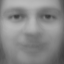

In [82]:
pca = PCA(n_components=2)
projected = pca.fit_transform(x_train_PCA1.reshape(-1, img_height*img_width))
print(img_height*img_width)
print(x_train_PCA1.shape)
print(projected.shape)

print(pca.explained_variance_ratio_)

cv2_imshow(pca.mean_.reshape(img_height, img_width)*255)

CMC

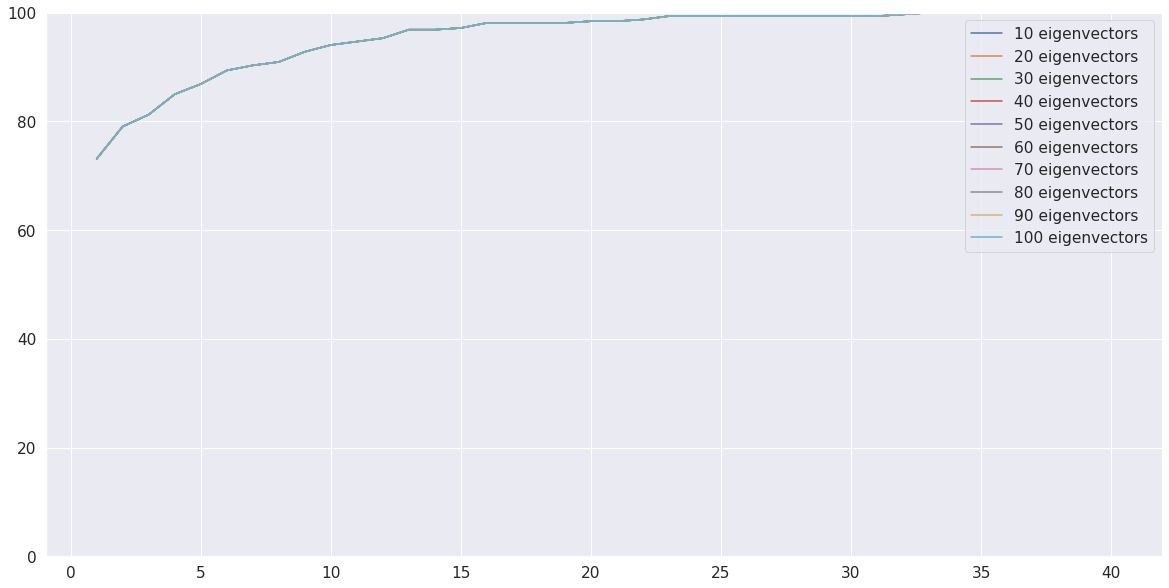

In [83]:
for i in range(10,101,10):
  pca = PCA(n_components=80)  #made 80 as temporary fix
  pca.fit(x_train_PCA1.reshape(-1, img_height*img_width))

  gallery = pca.transform(x_train_PCA1.reshape(-1, img_height*img_width))
  probe = pca.transform(x_test_PCA1.reshape(-1, img_height*img_width))

  CMC = {}
  for j in range(len(probe)):
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test_PCA1[j] == y_train_PCA1[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    ids = set()
    for k in range(len(gallery)):
      if y_test_PCA1[j] != y_train_PCA1[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train_PCA1[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES_PCA+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

Confusion Matrix

Accuracy: 0.7125


Text(317.28000000000003, 0.5, 'predicted label')

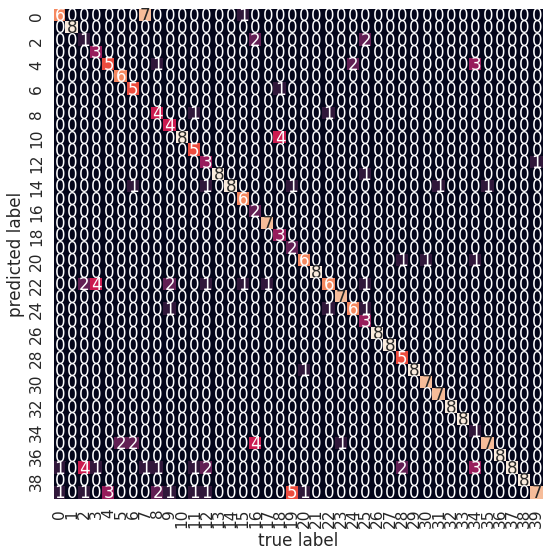

In [84]:
x_train_PCA1_matrix = pca.transform(x_train_PCA1)
x_test_PCA1_matrix = pca.transform(x_test_PCA1)

clf1 = SVC()
clf1.fit(x_train_PCA1_matrix, y_train_PCA1)
y_pred1 = clf1.predict(x_test_PCA1_matrix)

print("Accuracy:",metrics.accuracy_score(y_test_PCA1, y_pred1))

plt.figure(1, figsize=(16, 9))
mat = confusion_matrix(y_test_PCA1, y_pred1)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')



#### 50/50

Experiment

4096
(200, 4096)
(200, 2)
[0.23886332 0.11682399]


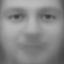

In [85]:
pca = PCA(n_components=2)
projected = pca.fit_transform(x_train_PCA2.reshape(-1, img_height*img_width))
print(img_height*img_width)
print(x_train_PCA2.shape)
print(projected.shape)

print(pca.explained_variance_ratio_)

cv2_imshow(pca.mean_.reshape(img_height, img_width)*255)

CMC

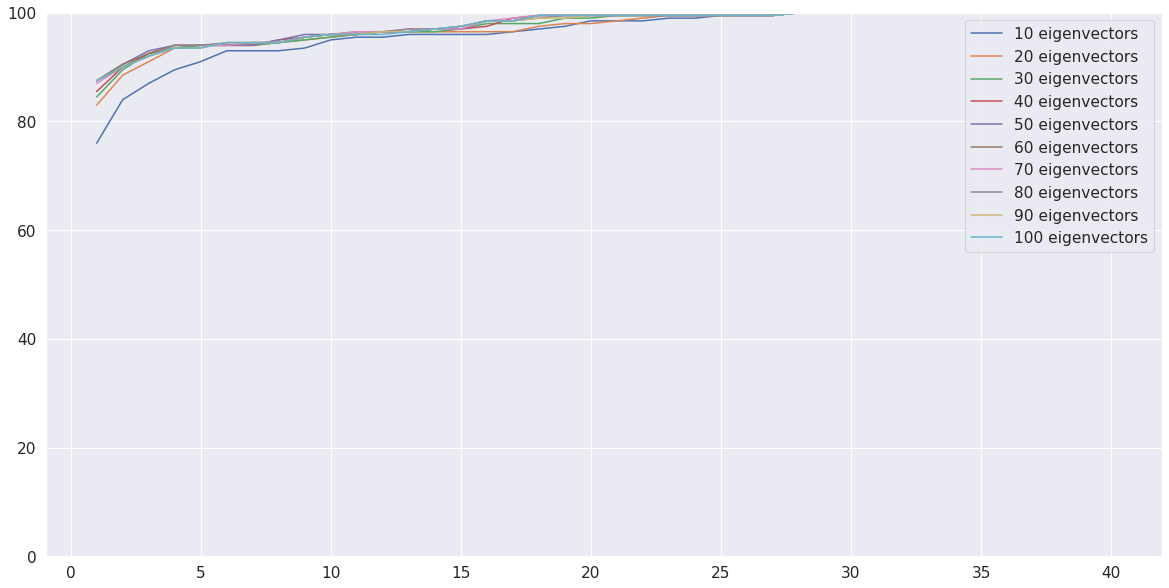

In [86]:
for i in range(10,101,10):
  pca = PCA(n_components=i)
  pca.fit(x_train_PCA2.reshape(-1, img_height*img_width))

  gallery = pca.transform(x_train_PCA2.reshape(-1, img_height*img_width))
  probe = pca.transform(x_test_PCA2.reshape(-1, img_height*img_width))

  CMC = {}
  for j in range(len(probe)):
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test_PCA2[j] == y_train_PCA2[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    ids = set()
    for k in range(len(gallery)):
      if y_test_PCA2[j] != y_train_PCA2[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train_PCA2[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES_PCA+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

Confusion Matrix

Accuracy: 0.86


Text(317.28000000000003, 0.5, 'predicted label')

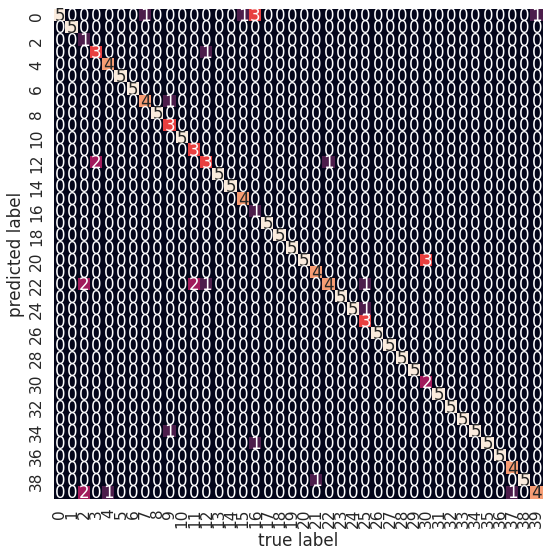

In [87]:
x_train_PCA2_matrix = pca.transform(x_train_PCA2)
x_test_PCA2_matrix = pca.transform(x_test_PCA2)

clf = SVC()
clf.fit(x_train_PCA2_matrix, y_train_PCA2)
y_pred2 = clf.predict(x_test_PCA2_matrix)

print("Accuracy:",metrics.accuracy_score(y_test_PCA2, y_pred2))

plt.figure(1, figsize=(16, 9))
mat = confusion_matrix(y_test_PCA2, y_pred2)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#### 80/20

Experiment

4096
(320, 4096)
(320, 2)
[0.23653707 0.12971424]


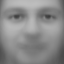

In [88]:
pca = PCA(n_components=2)
projected = pca.fit_transform(x_train_PCA3.reshape(-1, img_height*img_width))
print(img_height*img_width)
print(x_train_PCA3.shape)
print(projected.shape)

print(pca.explained_variance_ratio_)

cv2_imshow(pca.mean_.reshape(img_height, img_width)*255)

CMC

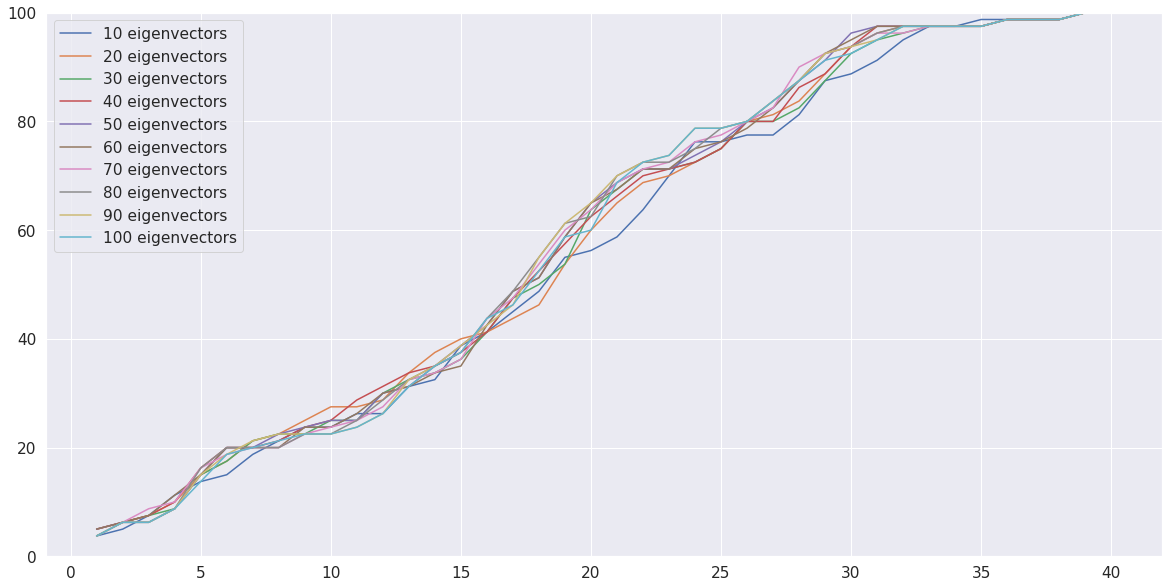

In [89]:
for i in range(10,101,10):
  pca = PCA(n_components=i)
  pca.fit(x_train_PCA3.reshape(-1, img_height*img_width))

  gallery = pca.transform(x_train_PCA3.reshape(-1, img_height*img_width))
  probe = pca.transform(x_test_PCA3.reshape(-1, img_height*img_width))

  CMC = {}
  for j in range(len(probe)):
    #compute distance to the closest correct label
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test_PCA2[j] == y_train_PCA3[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    #computes number of incorrect labels closer than closest correct label
    ids = set()
    for k in range(len(gallery)):
      if y_test_PCA3[j] != y_train_PCA3[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train_PCA3[k])
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1
  #record rank of closest correct label
  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES_PCA+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

Confusion Matrix

Accuracy: 0.9125


Text(317.28000000000003, 0.5, 'predicted label')

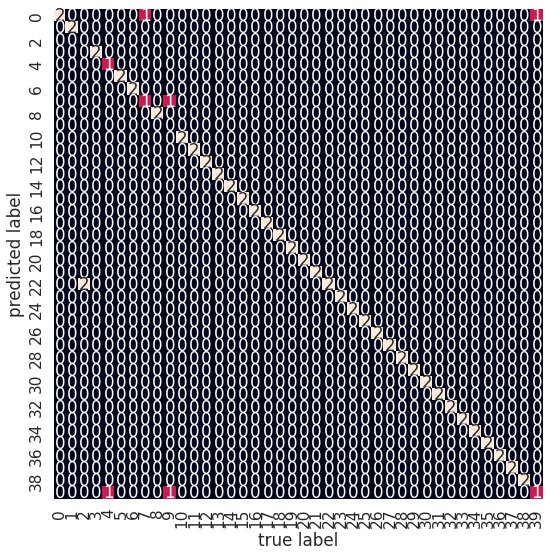

In [90]:
x_train_PCA3_matrix = pca.transform(x_train_PCA3)
x_test_PCA3_matrix = pca.transform(x_test_PCA3)

clf = SVC()
clf.fit(x_train_PCA3_matrix, y_train_PCA3)
y_pred3 = clf.predict(x_test_PCA3_matrix)

print("Accuracy:",metrics.accuracy_score(y_test_PCA3, y_pred3))

plt.figure(1, figsize=(16, 9))
mat = confusion_matrix(y_test_PCA3, y_pred3)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### LDA Experiments

#### 20/80

Experiment

(80, 4096)
(80, 2)


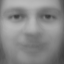

(40, 4096)


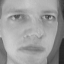

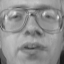

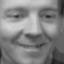

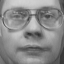

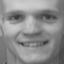

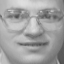

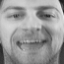

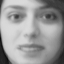

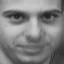

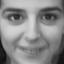

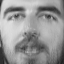

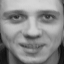

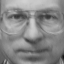

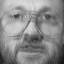

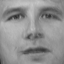

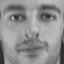

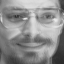

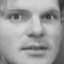

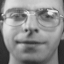

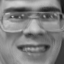

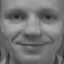

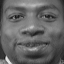

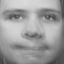

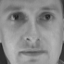

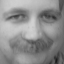

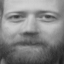

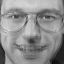

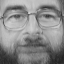

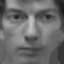

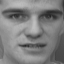

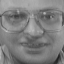

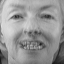

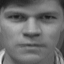

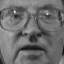

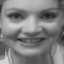

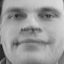

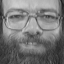

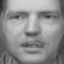

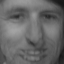

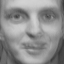

In [91]:
lda = LDA(n_components=2)
projected1 = lda.fit_transform(x_train_LDA1.reshape(-1, img_height*img_width), y_train_LDA1)
print(x_train_LDA1.shape)
print(projected1.shape)

cv2_imshow(lda.xbar_.reshape(img_height, img_width)*255)

print(lda.means_.shape)
for i in range(N_IDENTITIES_LDA):
  cv2_imshow(lda.means_[i].reshape(img_height, img_width)*255)

CMC

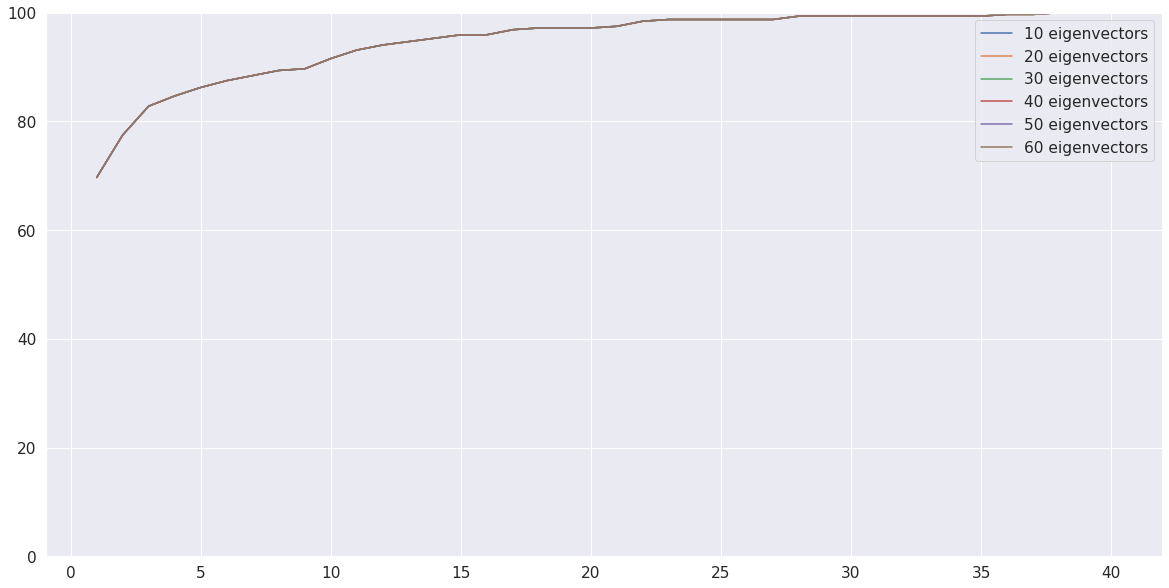

In [92]:
# CMC plots for LDA
for i in range(10,61,10):
  lda = LDA(n_components=20)  #20 for temporary fix
  lda.fit(x_train_LDA1.reshape(-1, img_height*img_width), y_train_LDA1)

  gallery = lda.transform(x_train_LDA1.reshape(-1, img_height*img_width))
  probe = lda.transform(x_test_LDA1.reshape(-1, img_height*img_width))

  CMC = {}
  # For each test case...
  for j in range(len(probe)):
    # Compute the distance to closest correct label.
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test_LDA1[j] == y_train_LDA1[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    # Compute number of incorrect labels closer than closest correct label.
    ids = set()
    for k in range(len(gallery)):
      if y_test_LDA1[j] != y_train_LDA1[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train_LDA1[k])
    # Record rank of closest correct label.
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES_LDA+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

Confusion Matrix

(80, 4096)
(80, 2)


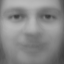

(40, 4096)


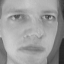

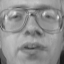

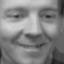

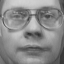

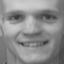

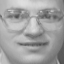

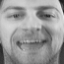

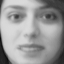

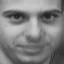

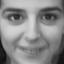

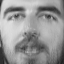

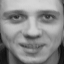

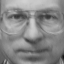

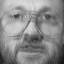

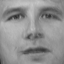

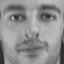

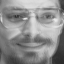

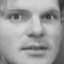

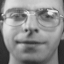

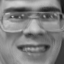

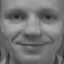

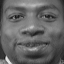

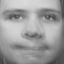

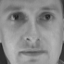

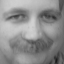

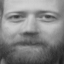

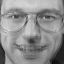

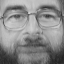

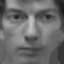

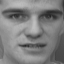

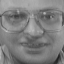

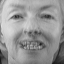

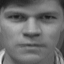

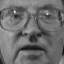

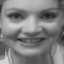

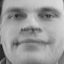

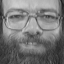

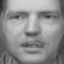

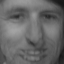

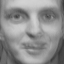

In [93]:
#added here again because somewhere cmc calc there is overlap and is messing with confusion matrix. so just reset
lda = LDA(n_components=2)
projected1 = lda.fit_transform(x_train_LDA1.reshape(-1, img_height*img_width), y_train_LDA1)
print(x_train_LDA1.shape)
print(projected1.shape)

cv2_imshow(lda.xbar_.reshape(img_height, img_width)*255)

print(lda.means_.shape)
for i in range(N_IDENTITIES_LDA):
  cv2_imshow(lda.means_[i].reshape(img_height, img_width)*255)

Accuracy: 0.240625


Text(317.28000000000003, 0.5, 'predicted label')

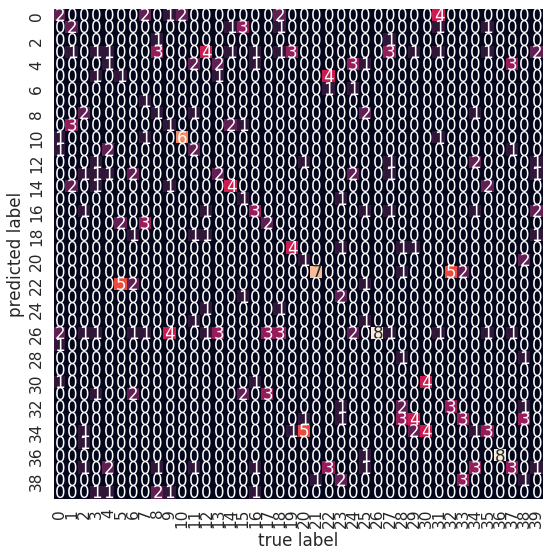

In [94]:
x_train_LDA1_matrix = lda.transform(x_train_LDA1)
x_test_LDA1_matrix = lda.transform(x_test_LDA1)

clf1 = SVC()
clf1.fit(x_train_LDA1_matrix, y_train_LDA1)
y_pred1 = clf1.predict(x_test_LDA1_matrix)

print("Accuracy:",metrics.accuracy_score(y_test_LDA1, y_pred1))

plt.figure(1, figsize=(16, 9))
mat = confusion_matrix(y_test_LDA1, y_pred1)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#### 50/50

Experiment

(200, 4096)
(200, 2)


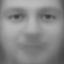

(40, 4096)


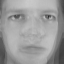

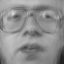

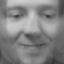

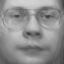

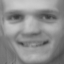

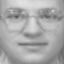

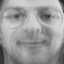

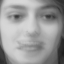

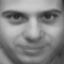

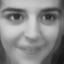

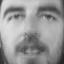

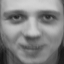

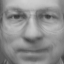

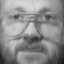

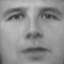

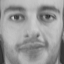

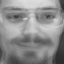

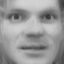

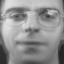

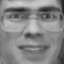

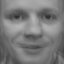

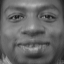

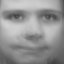

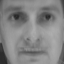

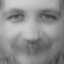

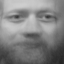

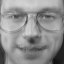

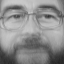

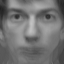

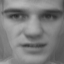

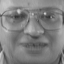

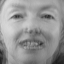

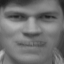

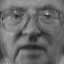

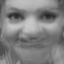

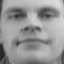

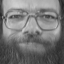

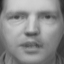

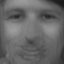

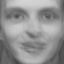

In [95]:
lda = LDA(n_components=2)
projected2 = lda.fit_transform(x_train_LDA2.reshape(-1, img_height*img_width), y_train_LDA2)
print(x_train_LDA2.shape)
print(projected2.shape)

cv2_imshow(lda.xbar_.reshape(img_height, img_width)*255)

print(lda.means_.shape)
for i in range(N_IDENTITIES_LDA):
  cv2_imshow(lda.means_[i].reshape(img_height, img_width)*255)

CMC

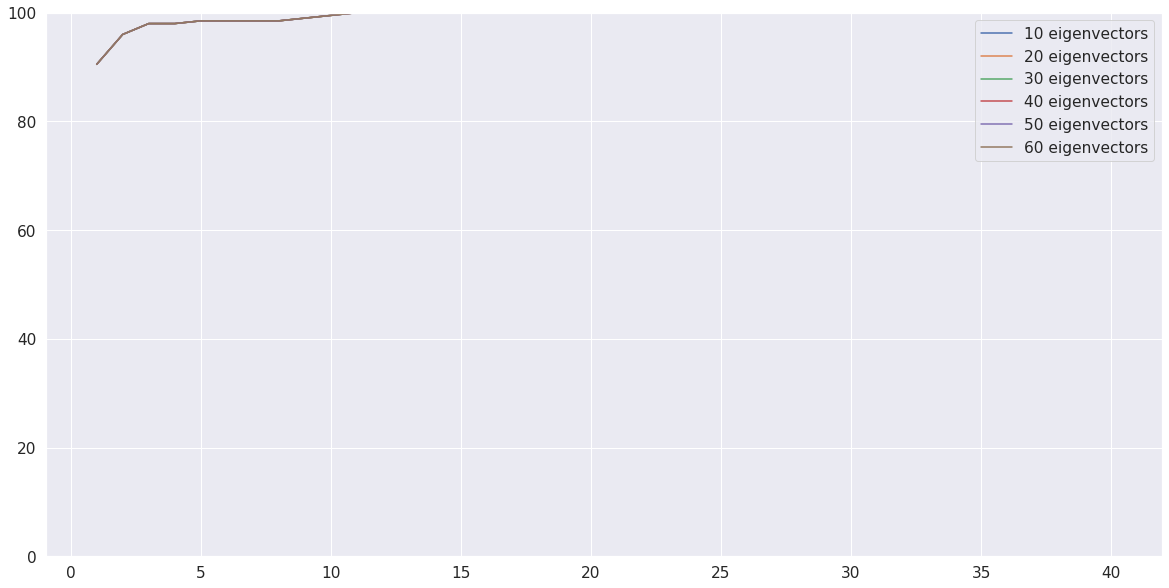

In [96]:
# CMC plots for LDA
for i in range(10,61,10):
  lda = LDA(n_components=20) #temporary fix
  lda.fit(x_train_LDA2.reshape(-1, img_height*img_width), y_train_LDA2)

  gallery = lda.transform(x_train_LDA2.reshape(-1, img_height*img_width))
  probe = lda.transform(x_test_LDA2.reshape(-1, img_height*img_width))

  CMC = {}
  # For each test case...
  for j in range(len(probe)):
    # Compute the distance to closest correct label.
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test_LDA2[j] == y_train_LDA2[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    # Compute number of incorrect labels closer than closest correct label.
    ids = set()
    for k in range(len(gallery)):
      if y_test_LDA2[j] != y_train_LDA2[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train_LDA2[k])
    # Record rank of closest correct label.
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES_LDA+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

Confusion Matrix

(200, 4096)
(200, 2)


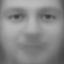

(40, 4096)


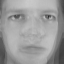

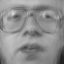

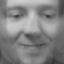

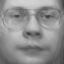

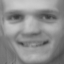

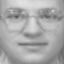

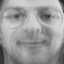

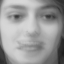

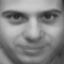

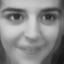

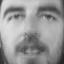

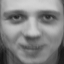

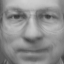

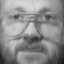

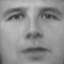

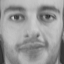

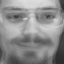

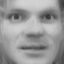

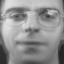

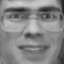

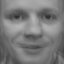

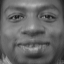

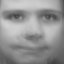

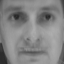

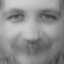

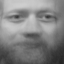

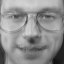

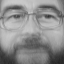

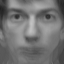

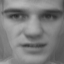

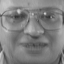

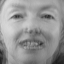

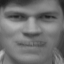

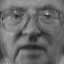

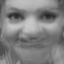

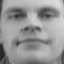

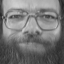

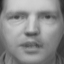

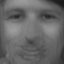

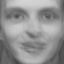

In [97]:
lda = LDA(n_components=2)
projected2 = lda.fit_transform(x_train_LDA2.reshape(-1, img_height*img_width), y_train_LDA2)
print(x_train_LDA2.shape)
print(projected2.shape)

cv2_imshow(lda.xbar_.reshape(img_height, img_width)*255)

print(lda.means_.shape)
for i in range(N_IDENTITIES_LDA):
  cv2_imshow(lda.means_[i].reshape(img_height, img_width)*255)

Accuracy: 0.385


Text(317.28000000000003, 0.5, 'predicted label')

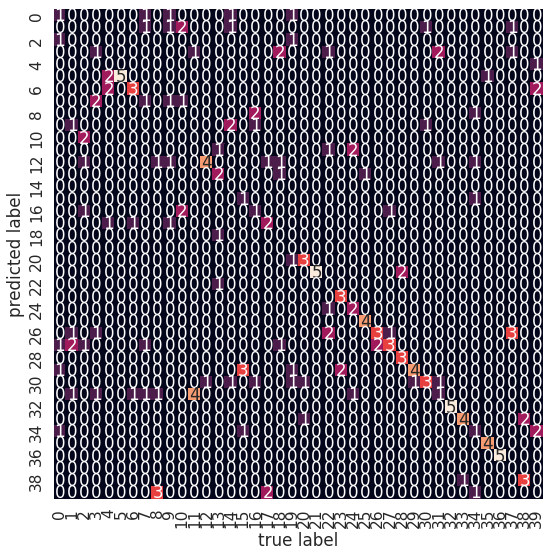

In [98]:
x_train_LDA2_matrix = lda.transform(x_train_LDA2)
x_test_LDA2_matrix = lda.transform(x_test_LDA2)

clf2 = SVC()
clf2.fit(x_train_LDA2_matrix, y_train_LDA2)
y_pred2 = clf2.predict(x_test_LDA2_matrix)

print("Accuracy:",metrics.accuracy_score(y_test_LDA2, y_pred2))

plt.figure(1, figsize=(16, 9))
mat = confusion_matrix(y_test_LDA2, y_pred2)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

#### 80/20

Experiment

(320, 4096)
(320, 2)


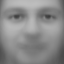

(40, 4096)


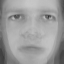

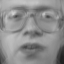

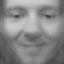

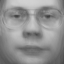

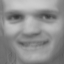

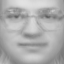

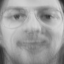

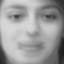

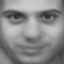

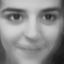

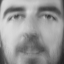

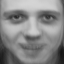

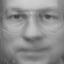

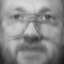

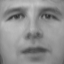

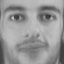

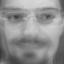

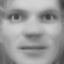

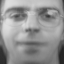

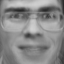

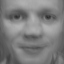

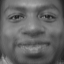

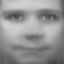

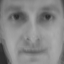

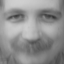

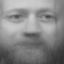

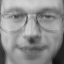

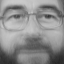

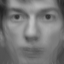

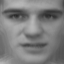

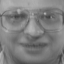

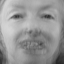

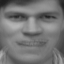

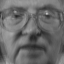

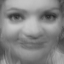

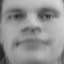

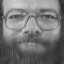

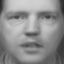

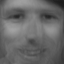

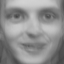

In [99]:
lda = LDA(n_components=2)
projected3 = lda.fit_transform(x_train_LDA3.reshape(-1, img_height*img_width), y_train_LDA3)
print(x_train_LDA3.shape)
print(projected3.shape)

cv2_imshow(lda.xbar_.reshape(img_height, img_width)*255)

print(lda.means_.shape)
for i in range(N_IDENTITIES_LDA):
  cv2_imshow(lda.means_[i].reshape(img_height, img_width)*255)

CMC

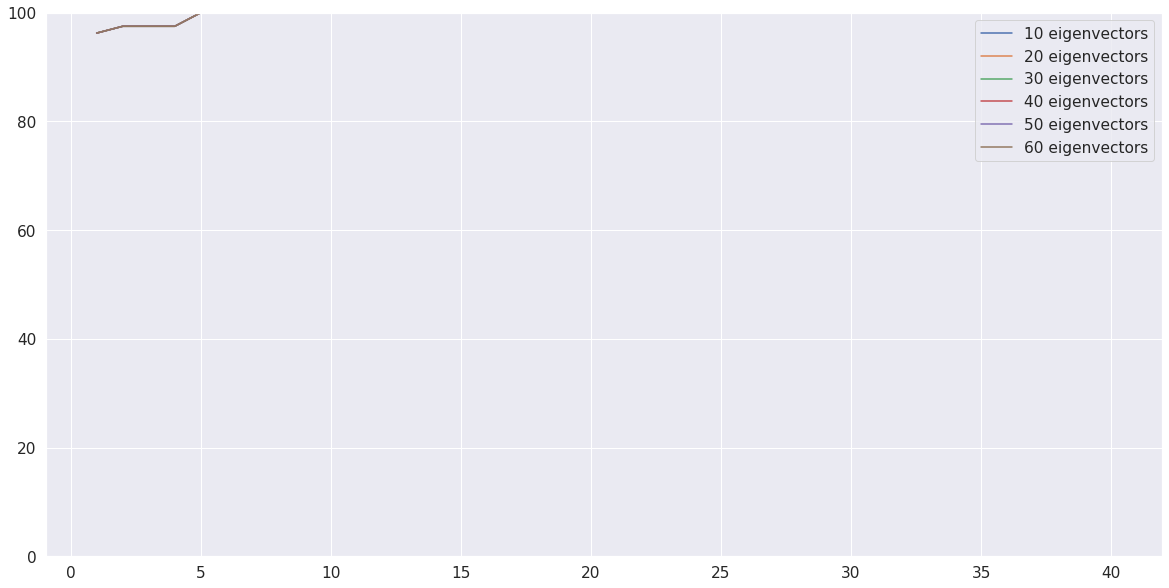

In [100]:
# CMC plots for LDA
for i in range(10,61,10):
  lda = LDA(n_components=20)  #temp fix
  lda.fit(x_train_LDA3.reshape(-1, img_height*img_width), y_train_LDA3)

  gallery = lda.transform(x_train_LDA3.reshape(-1, img_height*img_width))
  probe = lda.transform(x_test_LDA3.reshape(-1, img_height*img_width))

  CMC = {}
  # For each test case...
  for j in range(len(probe)):
    # Compute the distance to closest correct label.
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test_LDA3[j] == y_train_LDA3[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    # Compute number of incorrect labels closer than closest correct label.
    ids = set()
    for k in range(len(gallery)):
      if y_test_LDA3[j] != y_train_LDA3[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train_LDA3[k])
    # Record rank of closest correct label.
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES_LDA+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

Confusion Matrix

(320, 4096)
(320, 2)


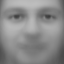

(40, 4096)


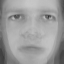

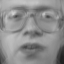

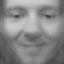

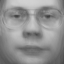

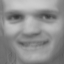

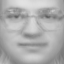

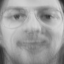

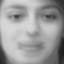

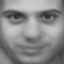

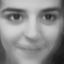

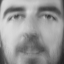

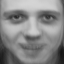

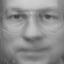

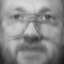

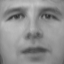

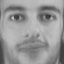

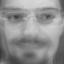

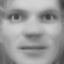

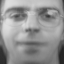

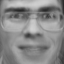

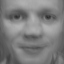

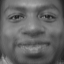

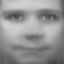

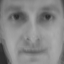

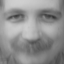

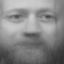

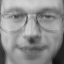

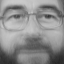

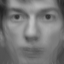

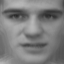

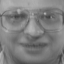

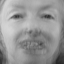

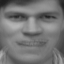

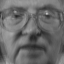

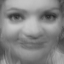

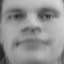

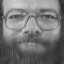

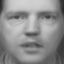

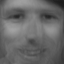

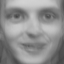

In [101]:
lda = LDA(n_components=2)
projected3 = lda.fit_transform(x_train_LDA3.reshape(-1, img_height*img_width), y_train_LDA3)
print(x_train_LDA3.shape)
print(projected3.shape)

cv2_imshow(lda.xbar_.reshape(img_height, img_width)*255)

print(lda.means_.shape)
for i in range(N_IDENTITIES_LDA):
  cv2_imshow(lda.means_[i].reshape(img_height, img_width)*255)

Accuracy: 0.55


Text(317.28000000000003, 0.5, 'predicted label')

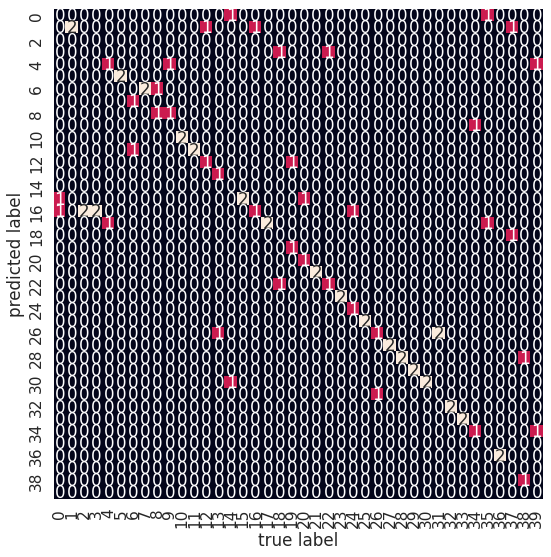

In [102]:
x_train_LDA3_matrix = lda.transform(x_train_LDA3)
x_test_LDA3_matrix = lda.transform(x_test_LDA3)

clf3 = SVC()
clf3.fit(x_train_LDA3_matrix, y_train_LDA3)
y_pred3 = clf3.predict(x_test_LDA3_matrix)

print("Accuracy:",metrics.accuracy_score(y_test_LDA3, y_pred3))

plt.figure(1, figsize=(16, 9))
mat = confusion_matrix(y_test_LDA3, y_pred3)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### SVM Experiments

#### 20/80

Experiment

In [103]:
model_cmc = SVC(kernel='linear', probability=True)
model_cmc.fit(x_train_SVM1, y_train_SVM1)

yfit1_cmc = model_cmc.predict_proba(x_test_SVM1)

print(yfit1_cmc.shape)

(320, 40)


CMC

In [104]:
def plot_CMC(ysimilarity, ytarget):
  assert len(ysimilarity) == len(ytarget)
  CMC = {}
  for i in range(len(ysimilarity)):
    # get similarity for the correct class
    genuine_sim = ysimilarity[i][ytarget[i]]
    # count how many incorrect classes have higher similarity
    rank = 1
    for j, sim in enumerate(ysimilarity[i]):
      if j != ytarget[i]:
        if sim >= genuine_sim:
          rank += 1
    # save rank
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  # cumulative sum to create CMC
  N = []
  rankN = []
  total = 0
  for i in range(1,len(ysimilarity[0])+1):
    if i in CMC:
      total += CMC[i]
    N.append(i)
    rankN.append(100.0*total/len(ysimilarity))

  plt.plot(N, rankN)
  plt.plot()

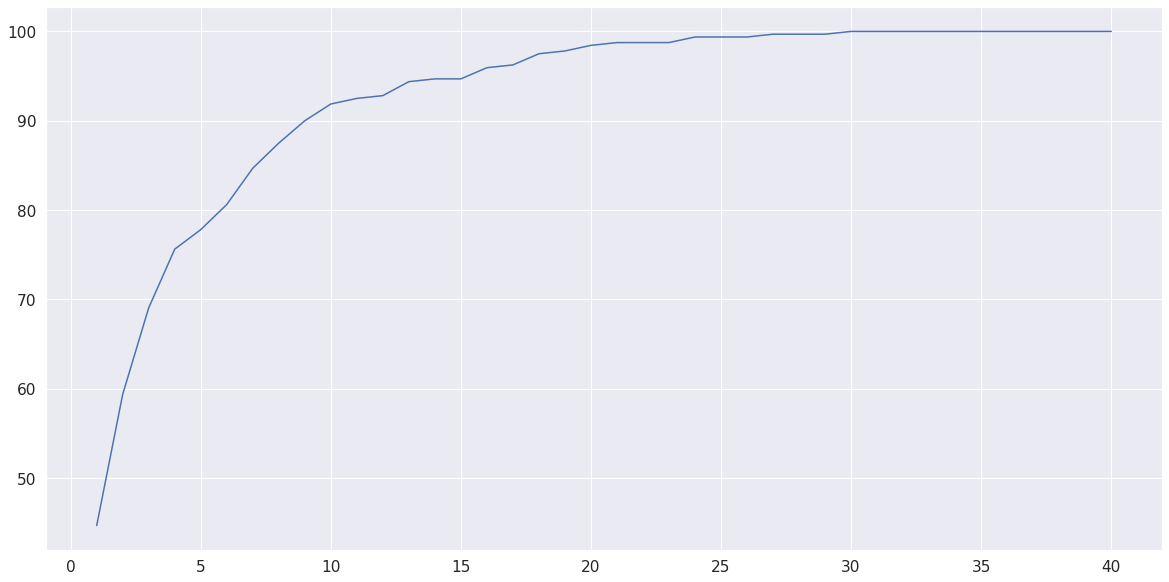

In [105]:
plot_CMC(yfit1_cmc, y_test_SVM1)

Confusion Matrix

In [106]:
model = SVC(kernel='linear')
model.fit(x_train_SVM1, y_train_SVM1)

yfit1 = model.predict(x_test_SVM1)

print("Accuracy:",metrics.accuracy_score(y_test_SVM1, yfit1))

Accuracy: 0.75625


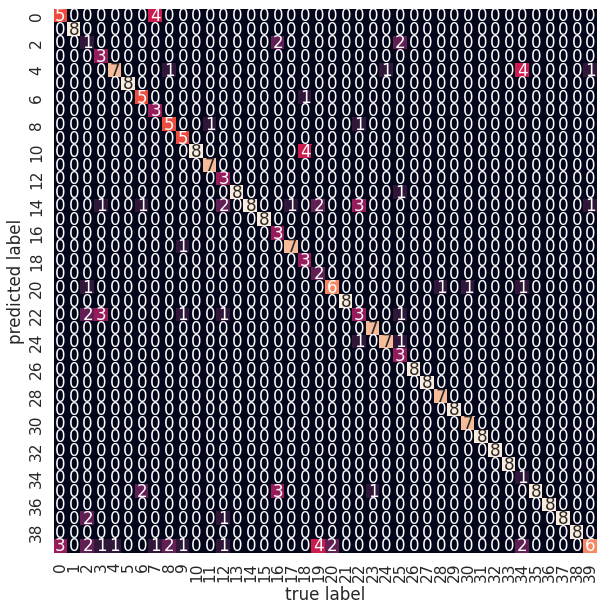

In [107]:
mat = confusion_matrix(y_test_SVM1, yfit1)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 50/50

Experiment

In [108]:
model_cmc = SVC(kernel='linear', probability=True)
model_cmc.fit(x_train_SVM2, y_train_SVM2)

yfit2_cmc = model_cmc.predict_proba(x_test_SVM2)

print(yfit2_cmc.shape)

(200, 40)


CMC

In [109]:
def plot_CMC(ysimilarity, ytarget):
  assert len(ysimilarity) == len(ytarget)
  CMC = {}
  for i in range(len(ysimilarity)):
    # get similarity for the correct class
    genuine_sim = ysimilarity[i][ytarget[i]]
    # count how many incorrect classes have higher similarity
    rank = 1
    for j, sim in enumerate(ysimilarity[i]):
      if j != ytarget[i]:
        if sim >= genuine_sim:
          rank += 1
    # save rank
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  # cumulative sum to create CMC
  N = []
  rankN = []
  total = 0
  for i in range(1,len(ysimilarity[0])+1):
    if i in CMC:
      total += CMC[i]
    N.append(i)
    rankN.append(100.0*total/len(ysimilarity))

  plt.plot(N, rankN)
  plt.plot()

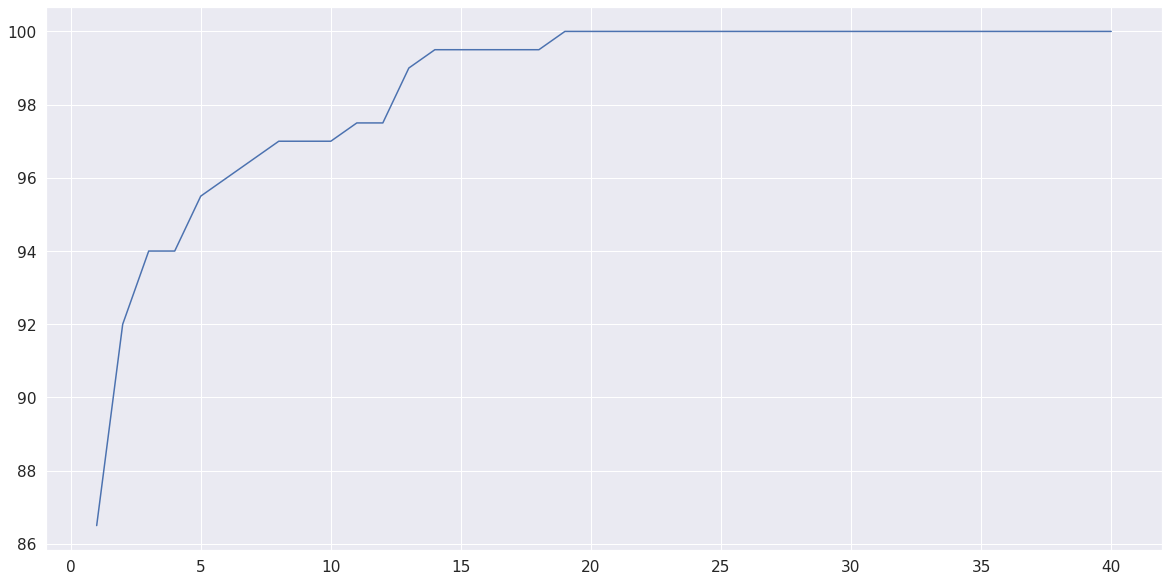

In [110]:
plot_CMC(yfit2_cmc, y_test_SVM2)

Confusion Matrix

In [111]:
model = SVC(kernel='linear')
model.fit(x_train_SVM2, y_train_SVM2)

yfit2 = model.predict(x_test_SVM2)

print("Accuracy:",metrics.accuracy_score(y_test_SVM2, yfit2))

Accuracy: 0.905


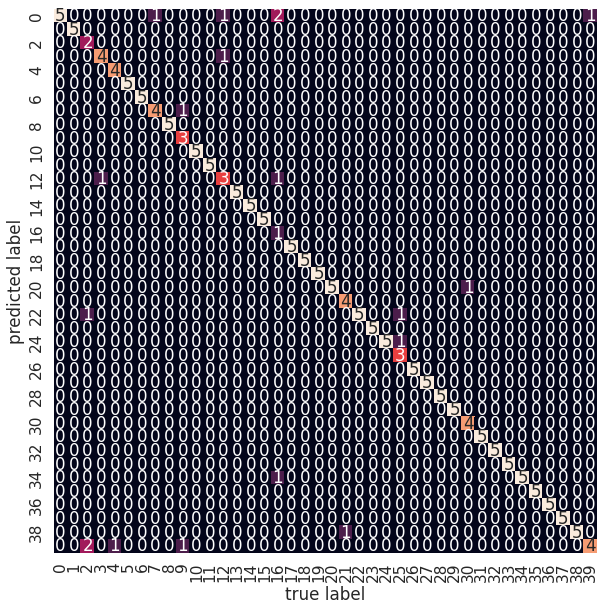

In [112]:
mat = confusion_matrix(y_test_SVM2, yfit2)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 80/20

Experiment

In [113]:
model_cmc = SVC(kernel='linear', probability=True)
model_cmc.fit(x_train_SVM3, y_train_SVM3)

yfit3_cmc = model_cmc.predict_proba(x_test_SVM3)

print(yfit3_cmc.shape)

(80, 40)


CMC

In [114]:
def plot_CMC(ysimilarity, ytarget):
  assert len(ysimilarity) == len(ytarget)
  CMC = {}
  for i in range(len(ysimilarity)):
    # get similarity for the correct class
    genuine_sim = ysimilarity[i][ytarget[i]]
    # count how many incorrect classes have higher similarity
    rank = 1
    for j, sim in enumerate(ysimilarity[i]):
      if j != ytarget[i]:
        if sim >= genuine_sim:
          rank += 1
    # save rank
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  # cumulative sum to create CMC
  N = []
  rankN = []
  total = 0
  for i in range(1,len(ysimilarity[0])+1):
    if i in CMC:
      total += CMC[i]
    N.append(i)
    rankN.append(100.0*total/len(ysimilarity))

  plt.plot(N, rankN)
  plt.plot()

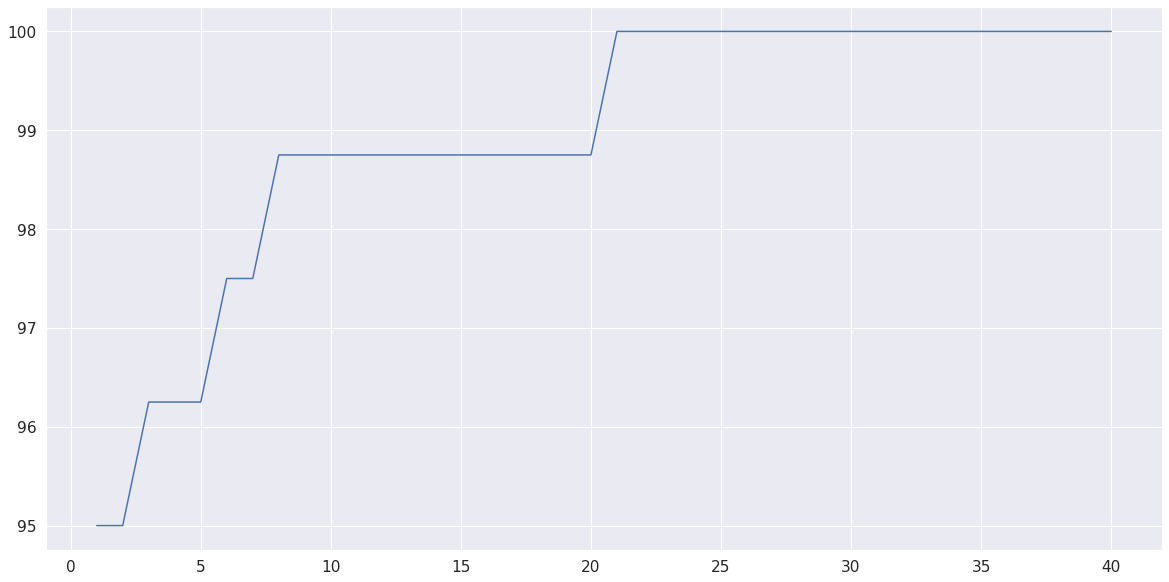

In [115]:
plot_CMC(yfit3_cmc, y_test_SVM3)

Confusion Matrix

In [116]:
model = SVC(kernel='linear')
model.fit(x_train_SVM3, y_train_SVM3)

yfit3 = model.predict(x_test_SVM3)

print("Accuracy:",metrics.accuracy_score(y_test_SVM3, yfit3))

Accuracy: 0.95


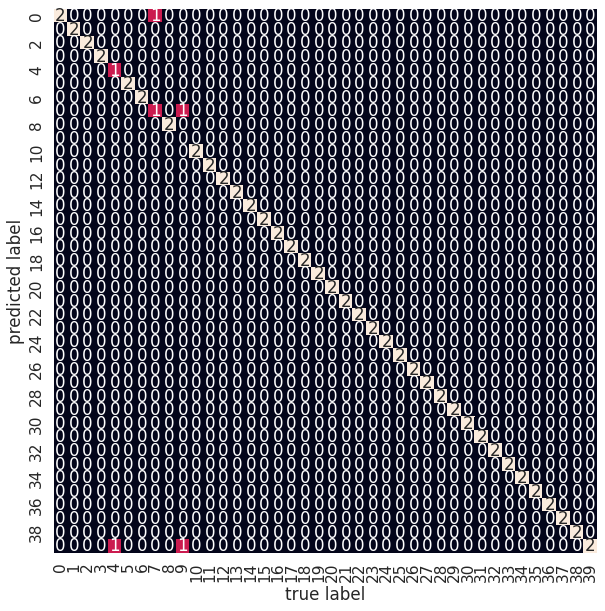

In [117]:
mat = confusion_matrix(y_test_SVM3, yfit3)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Report your results

Check these amazing plots I have below!

# IMDB Movie Review Dataset
Description from https://www.tensorflow.org/datasets/catalog/imdb_reviews:
> Large Movie Review Dataset. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.

In [118]:
import tensorflow_datasets
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Load dataset

In [119]:
dataset, info = tensorflow_datasets.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Get subset of the data for training and testing (2000 samples each). Convert Keras dataset to lists of strings and labels.

In [120]:
x_train = []
y_train = []

for sample, label in train_dataset.take(2000):
  x_train.append(sample.numpy())
  y_train.append(label.numpy())

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print(x_train[0])
print(y_train[0])

x_test = []
y_test = []

for sample, label in test_dataset.take(2000):
  x_test.append(sample.numpy())
  y_test.append(label.numpy())

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print(x_test[0])
print(y_test[0])

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
0
b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of th

# Baseline


Here is the code for my baseline, along with an explanation of how it works and why it makes sense for this problem.



## Multinomial Naive Bayes Baseline
This technique is pretty fast and simple to use. Sentiment analysis is a pretty easy task in terms of text classifciation, so it offers a pretty good baseline. This works by putting the data in a bag of words model, counting the words as vectors, then making predictions off of vectorization.

MultinomialNB has low computation cost, can work with alrge datasets, is easy to implement, and works well with text classification models. It typically has a higher success rate than other algorithms, which me might see later.

In [121]:
import sys
sys.path.append('../src')
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import tensorflow_datasets
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

In [122]:
dataset, info = tensorflow_datasets.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [123]:
x_train = []
y_train = []

for sample, label in train_dataset.take(2000):
  x_train.append(sample.numpy())
  y_train.append(label.numpy())

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print(x_train[0])
print(y_train[0])

x_test = []
y_test = []

for sample, label in test_dataset.take(2000):
  x_test.append(sample.numpy())
  y_test.append(label.numpy())

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print(x_test[0])
print(y_test[0])

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
0
b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of th

In [124]:
cv = CountVectorizer(max_features=20000)
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)


In [125]:
x_train = pd.DataFrame(x_train.toarray())

In [126]:
model = MultinomialNB().fit(x_train, y_train)

In [127]:
y_pred = model.predict(x_test)

In [128]:
accuracy_score(y_test, y_pred)

0.8135

In [129]:
'''
pred = np.argmax(y_pred, axis = 1)
mat_1 = confusion_matrix(y_test, pred)
plt.figure(figsize = (16,9))
sns.heatmap(mat_1.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.title("Eval_1")
plt.xlabel('true label')
plt.ylabel('predicted label')
'''

'\npred = np.argmax(y_pred, axis = 1)\nmat_1 = confusion_matrix(y_test, pred)\nplt.figure(figsize = (16,9))\nsns.heatmap(mat_1.T, square = True, annot = True, fmt = \'d\', cbar = False)\nplt.title("Eval_1")\nplt.xlabel(\'true label\')\nplt.ylabel(\'predicted label\')\n'

# Run the experiments

Here is the code I used to get the results below!

## loading data again cause its messing with reimplementations

In [130]:
import tensorflow_datasets
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

In [131]:
dataset, info = tensorflow_datasets.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [132]:
x_train = []
y_train = []

for sample, label in train_dataset.take(2000):
  x_train.append(sample.numpy())
  y_train.append(label.numpy())

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print(x_train[0])
print(y_train[0])

x_test = []
y_test = []

for sample, label in test_dataset.take(2000):
  x_test.append(sample.numpy())
  y_test.append(label.numpy())

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print(x_test[0])
print(y_test[0])

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
0
b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of th

## Vanilla RNN

In [133]:
max_words = 2000
#max_len = 100
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=max_words)#, output_sequence_length=max_len)

vectorize_layer.adapt(x_train)

In [134]:
vocab = np.array(vectorize_layer.get_vocabulary())
vocab[:100]

array(['', '[UNK]', 'the', 'a', 'and', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'but', 'movie',
       'film', 'on', 'you', 'not', 'are', 'his', 'have', 'be', 'he',
       'one', 'at', 'its', 'all', 'they', 'by', 'an', 'so', 'who', 'her',
       'like', 'from', 'just', 'if', 'or', 'out', 'about', 'has', 'what',
       'some', 'good', 'there', 'very', 'when', 'more', 'my', 'no', 'she',
       'even', 'up', 'which', 'time', 'had', 'would', 'really', 'me',
       'only', 'can', 'were', 'see', 'story', 'their', 'than', 'get',
       'much', 'great', 'into', 'do', 'first', 'because', 'we', 'been',
       'will', 'well', 'bad', 'other', 'also', 'most', 'dont', 'how',
       'him', 'too', 'films', 'then', 'made', 'people', 'way', 'movies',
       'make', 'them', 'could'], dtype='<U14')

In [135]:
print(x_train[:2])
vectorized = vectorize_layer(x_train[:2]).numpy()
print(vectorized)

[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development w

In [136]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=64, mask_zero=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 64)          128000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 140,481
Trainable params: 140,481
Non-trainable params: 0
________________________________________________

In [137]:
# og learning rate = 1e-4
learning_rate = 0.0001

# number of samples to work through before updating internal model paramters
# batchsize must be more than or equal to one and less than or equal to number of samples in training dataset
batch_size = 50
# number of times the learning algo will work through entire training dataset
#  can be 1 to infininty
num_epochs = 10

In [138]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/10
40/40 [==============================] - 40s 982ms/step - loss: 0.6935 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5130
Epoch 2/10
40/40 [==============================] - 41s 1s/step - loss: 0.6821 - accuracy: 0.5825 - val_loss: 0.6916 - val_accuracy: 0.5260
Epoch 3/10
40/40 [==============================] - 41s 1s/step - loss: 0.6703 - accuracy: 0.6420 - val_loss: 0.6811 - val_accuracy: 0.5840
Epoch 4/10
40/40 [==============================] - 40s 997ms/step - loss: 0.6487 - accuracy: 0.6805 - val_loss: 0.6697 - val_accuracy: 0.6010
Epoch 5/10
40/40 [==============================] - 40s 1s/step - loss: 0.6425 - accuracy: 0.6820 - val_loss: 0.6877 - val_accuracy: 0.5375
Epoch 6/10
40/40 [==============================] - 39s 983ms/step - loss: 0.6133 - accuracy: 0.7335 - val_loss: 0.6810 - val_accuracy: 0.5675
Epoch 7/10
40/40 [==============================] - 39s 987ms/step - loss: 0.5867 - accuracy: 0.7520 - val_loss: 0.6298 - val_accuracy: 0.6700
Epoch 8/

(0.0, 0.7089779078960419)

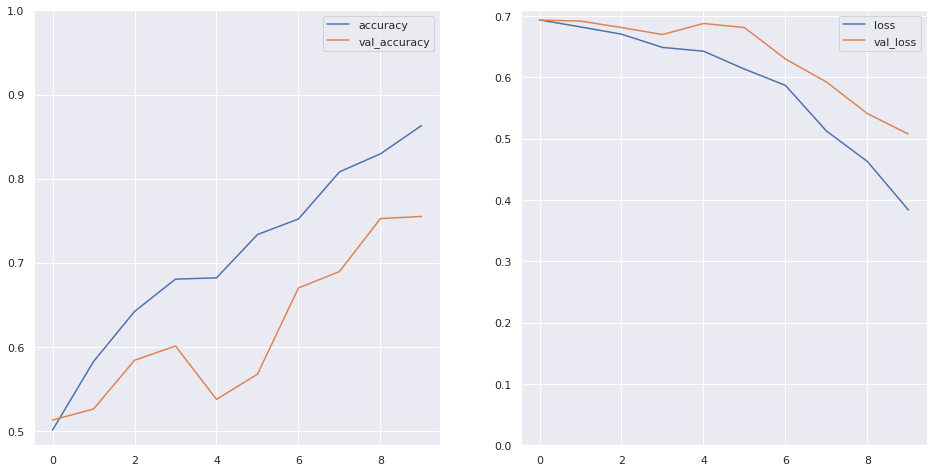

In [139]:
#commented out xlabel and ylabel because was getting error of matlab not having xlabel or ylabel. could not figure out
#the leftmost graph ylabel is accuracy. the rightmost graph ylabel is loss.
#the x axis on both is Epochs

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  #plt.xlabel("Epochs")
  #plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

63/63 [==============================] - 5s 78ms/step


Text(322.28000000000003, 0.5, 'predicted label')

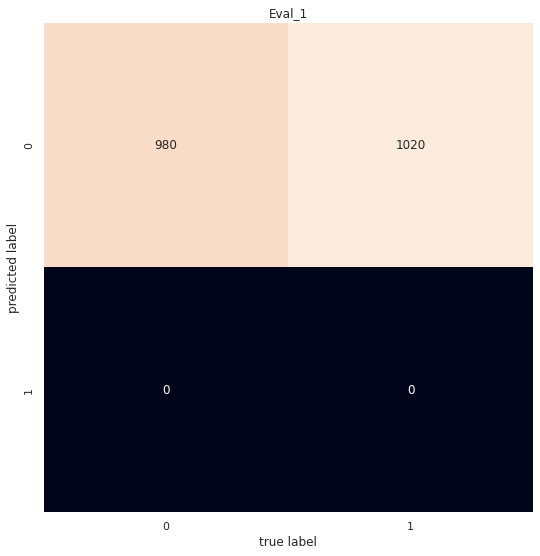

In [140]:

prediction = model.predict(x_test)
pred = np.argmax(prediction, axis = 1)
mat_1 = confusion_matrix(y_test, pred)
plt.figure(figsize = (16,9))
sns.heatmap(mat_1.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.title("Eval_1")
plt.xlabel('true label')
plt.ylabel('predicted label')



## loading data again cause its messing with reimplementations

In [141]:
import tensorflow_datasets
import tensorflow as tf
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

In [142]:
dataset, info = tensorflow_datasets.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [143]:
x_train = []
y_train = []

for sample, label in train_dataset.take(2000):
  x_train.append(sample.numpy())
  y_train.append(label.numpy())

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print(x_train[0])
print(y_train[0])

x_test = []
y_test = []

for sample, label in test_dataset.take(2000):
  x_test.append(sample.numpy())
  y_test.append(label.numpy())

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print(x_test[0])
print(y_test[0])

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
0
b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of th

## Augmented RNN

In [144]:
max_words = 2000
max_len = 100
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=max_words)#, output_sequence_length=max_len)

vectorize_layer.adapt(x_train)

In [145]:
vocab = np.array(vectorize_layer.get_vocabulary())
vocab[:100]

array(['', '[UNK]', 'the', 'a', 'and', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'but', 'movie',
       'film', 'on', 'you', 'not', 'are', 'his', 'have', 'be', 'he',
       'one', 'at', 'its', 'all', 'they', 'by', 'an', 'so', 'who', 'her',
       'like', 'from', 'just', 'if', 'or', 'out', 'about', 'has', 'what',
       'some', 'good', 'there', 'very', 'when', 'more', 'my', 'no', 'she',
       'even', 'up', 'which', 'time', 'had', 'would', 'really', 'me',
       'only', 'can', 'were', 'see', 'story', 'their', 'than', 'get',
       'much', 'great', 'into', 'do', 'first', 'because', 'we', 'been',
       'will', 'well', 'bad', 'other', 'also', 'most', 'dont', 'how',
       'him', 'too', 'films', 'then', 'made', 'people', 'way', 'movies',
       'make', 'them', 'could'], dtype='<U14')

In [146]:
print(x_train[:2])
vectorized = vectorize_layer(x_train[:2]).numpy()
print(vectorized)

[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development w

In [147]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
32/32 [==============================] - 13s 185ms/step - loss: 0.6930 - accuracy: 0.5105 - val_loss: 0.6929 - val_accuracy: 0.5215
Epoch 2/20
32/32 [==============================] - 3s 110ms/step - loss: 0.6923 - accuracy: 0.5895 - val_loss: 0.6927 - val_accuracy: 0.5370
Epoch 3/20
32/32 [==============================] - 3s 109ms/step - loss: 0.6914 - accuracy: 0.6060 - val_loss: 0.6921 - val_accuracy: 0.5645
Epoch 4/20
32/32 [==============================] - 3s 107ms/step - loss: 0.6899 - accuracy: 0.6500 - val_loss: 0.6911 - val_accuracy: 0.5730
Epoch 5/20
32/32 [==============================] - 3s 107ms/step - loss: 0.6871 - accuracy: 0.6725 - val_loss: 0.6891 - val_accuracy: 0.5925
Epoch 6/20
32/32 [==============================] - 4s 111ms/step - loss: 0.6812 - accuracy: 0.7020 - val_loss: 0.6833 - val_accuracy: 0.6160
Epoch 7/20
32/32 [==============================] - 4s 113ms/step - loss: 0.6574 - accuracy: 0.6920 - val_loss: 0.6240 - val_accuracy: 0.6610
Epoch

(0.0, 0.713927400112152)

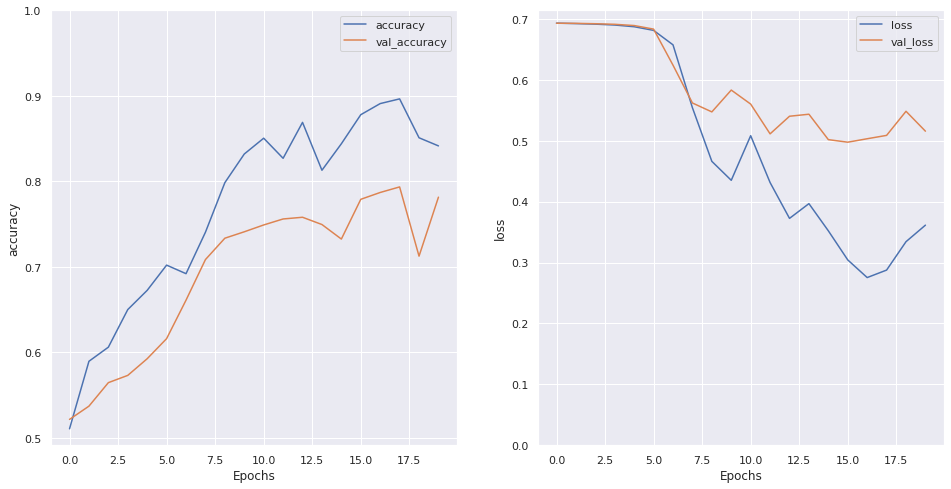

In [148]:
#commented out xlabel and ylabel because was getting error of matlab not having xlabel or ylabel. could not figure out
#the leftmost graph ylabel is accuracy. the rightmost graph ylabel is loss.
#the x axis on both is Epochs

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

63/63 [==============================] - 5s 33ms/step


Text(322.28000000000003, 0.5, 'predicted label')

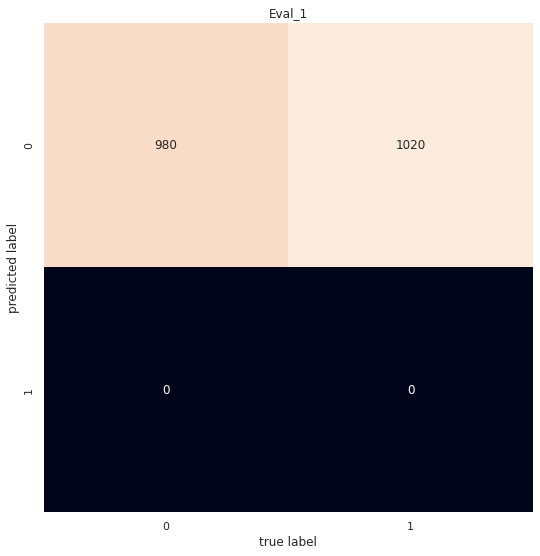

In [149]:

prediction = model.predict(x_test)
pred = np.argmax(prediction, axis = 1)
mat_1 = confusion_matrix(y_test, pred)
plt.figure(figsize = (16,9))
sns.heatmap(mat_1.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.title("Eval_1")
plt.xlabel('true label')
plt.ylabel('predicted label')



# Report your results


## Facial Recognition

#### Is LeNet-5 better thatn PCA/LDA/SVM?

CNN/LeNet-5 performas better than PCA and LDA, but not SVM. LeNet-5 performed better than PCA and LDA, but performed a little under the performance of SVM. My implementation of SVM had an average accuracy test rating of 86% while CNN's accuracy was around 75%. This is better than LDA's 59% accuracy and PCA's 22% accuracy. However, I do believe last project's PCA and LDA sections require a little more fine tuning to get proper results. Despite this CNN outperformed both LDA and PCA, but falls short under SVM. THe performance of CNN is probably not better than SVM, because CNN would perform better with a larger dataset to train on. This is further shown in the next section, but SVM does not require this to perform well. The Olivetti dataset is pretty small, only being around 400 different images, so CNN is not able to show its full use here.

#### Is there a clear difference in performance for different train/test data splits for LeNet-5/CNN?

There is a clear difference in performance for different train/test splits. There is a trend of CNN being more accuate with more training data. The 20/80 split performed dismally with 60% accuracy on the test. 50/50 had a 74% accuracy and the 90/20 had a 93% accuracy, showing a trend in increased accuracy the more training data CNN recieves. Interestingly enough, the training accuracy had high accuracy for all three splits, but when it came to implementing the test it differed depending on the split type. This is a problem of overfitting and I had issues resolving this while testing different parameters and ways to set up the CNN. So I am unsure at this point if the final implementation is completely correct.

#### Does data augmentation improve the results?

Data augmentation did not improve the results with my CNN implementation. The 20/80 split made the accuracy fall to below 10%. The 50/50 split resulted in 75% accuracy, which is not a significant improvement. THe 80/20 split overfit the data too much to even consider it. I used the data augmentation used by the lecture given to us to use. While data augmentation can improve the results, it needs to be set up properly to see these improvements. Typically data augmentation improves accuracy by reducing overfitting by creating more synthetic data for the model to learn from at a low cost. But this is reliant on the data augmentation strategy to be properly set up. I was unsure how to properly tweak the given one, so the best I can say is that it is potentially useful with more experimentation. I used the ImageDataGenerator from keras. This augmentation makes the transformation of data on a random basis and gives the output result containing only the data that is newly transformed and does not add data. I hoped it would help reduce the overfitting occuring in the training set, but it was not the case.


## Text Classification


#### Is the vanilla RNN better than a simple baseline?

My baseline was a multinomial naive bayes implementation. The vanilla RNN was not better than the simple baseline. The baseline had an accuracy score of 81% while vanilla RNN had an accuracy score of 73%. This is probably because the naive bayes didn't need much to perform well in this scenario since it excels at a task like sentiment analysis.

#### How sensitive is the RNN performance to hyperparameter selection

RNN performance is rediculously sensitive to hyperparameter selection. This was a pain to mess with. Just staying in the same learning rate of 0.0001 and adjusting batch and epoch sizes changed the values greatly. 

For learning rate(0.0001), batch(64), epoch(10): accuracy was 0.70.

For learning rate(0.0001), batch(50), epoch(10): accuracy was 0.72.

For learning rate(0.0001), batch(100), epoch(10): accuracy was 0.72.

For learning rate(0.0001), batch(50), epoch(5): accuracy was 0.70.

For learning rate(0.0001), batch(50), epoch(30): accuracy was 1.64.

For learning rate(0.0001), batch(50), epoch(20): accuracy was 1.25.

For learning rate(0.001), batch(50), epoch(10): accuracy was 1.68.

For learning rate(0.00001), batch(50), epoch(10): accuracy was 0.69.

For learning rate(0.01), batch(50), epoch(10): accuracy was (lost the accuracy rating, but it was overfitted model).

Any changes to the learning rate resulted in differences in accuracy, mainly overfitting the model. The learning rate of 0.0001 did the best of the learning rates, so the majority of testing occured from that point, changing batch size and epochs. There wasn't too much difference when changing batch size, but changing epochs would result in overvalued accuracy from the testing.

#### Does data augmentation improve the results? More or less than for the favial recognition task? What properties of the two tasks do you think is leading to the data augmentation effects you are seeing?

Data augmentation did not improve the results. I do have to state that I don't think I was able to properly implement augmented data, but based on what I have it does not improve results, less so than the facial regocnition task. The facial recognition probably benefits from data augmentation because its based on pixels while text classification is based on words. Augmented facial recognition problems can have images changed so there is more data to train on so there is less overfitting. Augmented text classification does not seem to benefit in the same way facial recognition does. Augmenting words does not seem to result in the same benefit from changing image layouts. Different assortments of words does not always convey the same message unless done properly. This can be done by changing the synonyms and so forth. Honestly when implementing the augmented layer, I did not think of this. I ended up doing a LSTM of on the IBDM data thinking it was some form of data augmentation. Now while writing the report, I know I could have done something to change values of the words. THis would have been a better implemenation, but this in hindsight and I no longer have time to implement as I'm already 3 days overdue.